In [95]:
import torch
import numpy as np
from glob import glob
import os
import matplotlib
PATH = '/home/michael/Dropbox/Master thesis/results_graph-dc/CSVs/FedDomSep_simple_2_branches_multistep_correct/CLUB/FeatureAnalysis/FeatureAnalysisGraph-DC_2_out_only_CLUB_Diff_global_private_only_2_branches_NEW_sim_loss_lr_0_1_A0_F0_005_F0_005_H10/FedDomSep_GraphDC_gin_on_fs_contest_data_lr0.1_lstep1_/features'

train_test_val = 'train'

save_path = '/home/michael/Dropbox/Master thesis/results_graph-dc/CSVs/FedDomSep_simple_2_branches_multistep_correct/CLUB/FeatureAnalysis/FeatureAnalysisGraph-DC_2_out_only_CLUB_Diff_global_private_only_2_branches_NEW_sim_loss_lr_0_1_A0_F0_005_F0_005_H10' +'/'+ train_test_val + '/'
if train_test_val == 'train':
    nun_samples = 11649
elif train_test_val == 'val':
    nun_samples = 3883
elif train_test_val == 'test':
    nun_samples = 3889

In [96]:
font = {'size'   : 22}

matplotlib.rc('font', **font)

In [97]:
#interm_trains = {1:[], 2:[],3:[], 4:[],5:[], 6:[],7:[], 8:[],9:[], 10:[],11:[], 12:[],13:[]}
global_trains = {1:[], 2:[],3:[], 4:[],5:[], 6:[],7:[], 8:[],9:[], 10:[],11:[], 12:[],13:[]}
local_trains = {1:[], 2:[],3:[], 4:[],5:[], 6:[],7:[], 8:[],9:[], 10:[],11:[], 12:[],13:[]}
labels = {1:[], 2:[],3:[], 4:[],5:[], 6:[],7:[], 8:[],9:[], 10:[],11:[], 12:[],13:[]}


In [98]:
all_files = [file
                 for path, subdir, files in os.walk(PATH)
                 for file in glob(os.path.join(path, '*.pt'))]
all_files.sort()

In [99]:
def get_files(path):
    for client in range(1, 13+1):
        client_path = f"{PATH}/client_{client}"
        all_files = [file
                 for path, subdir, files in os.walk(client_path)
                 for file in glob(os.path.join(path, '*.pt'))]
        all_files.sort()
        for file in all_files:
            file_name = os.path.basename(file)
            file_name_without_ending = file_name[:-3]
            if file_name_without_ending.startswith('x_global_' + train_test_val) and not file_name_without_ending.endswith('labels'):
                global_trains[client].append(torch.load(file).cpu().detach().numpy())
            if file_name_without_ending.startswith('x_local_' + train_test_val) and not file_name_without_ending.endswith('labels'):
                local_trains[client].append(torch.load(file).cpu().detach().numpy())
            if file_name_without_ending.startswith(train_test_val) and file_name_without_ending.endswith('labels'):
                labels[client].append(torch.load(file).cpu().detach().numpy())
        #interm_trains[client] = np.concatenate(interm_trains[client])
        global_trains[client] = np.concatenate(global_trains[client])
        local_trains[client] = np.concatenate(local_trains[client])
        labels[client] = np.concatenate(labels[client])


In [100]:
get_files(PATH)

In [101]:
import numpy as np
#concat_X=global_train
data_out_local_global = {}
data_out_local = {}
data_out_global = {}

for key in local_trains.keys():
    data_out_local_global[key] = global_trains[key] + local_trains[key]
    data_out_local[key] = local_trains[key]
    data_out_global[key] = global_trains[key]

X_concat_local_global = []
X_concat_local = []
X_concat_global = []
labels_concat = []

for key in local_trains.keys():
    X_concat_local_global.append(data_out_local_global[key])
    X_concat_local.append(data_out_local[key])
    X_concat_global.append(data_out_global[key])
    labels_concat.append(labels[key])

X_concat_local_global = np.concatenate(X_concat_local_global)
X_concat_local = np.concatenate(X_concat_local)
X_concat_global = np.concatenate(X_concat_global)

labels_concat = np.concatenate(labels_concat)

In [146]:
local_trains[1].mean(axis=0)

array([4.6587665e-02, 1.9136481e-01, 3.2513343e-02, 3.9191732e-01,
       4.8883846e-01, 4.4616127e-01, 5.8499806e-02, 2.0320479e-02,
       2.7617925e-01, 3.9568942e-02, 7.6197505e-02, 2.2450666e-01,
       4.5637581e-02, 1.6596214e-01, 4.0348142e-01, 1.0193008e-01,
       5.4755632e-02, 2.3983385e-01, 1.5634930e-02, 2.9798785e-02,
       1.4656465e-01, 5.0198638e-01, 1.9429190e-01, 2.1750136e-01,
       1.8436031e-01, 6.1371143e-04, 5.2935693e-02, 3.3981703e-02,
       2.5249174e-01, 1.4186130e-03, 4.5413282e-02, 4.4313449e-01,
       6.6032603e-02, 2.2496839e-01, 1.6636661e-01, 4.6016970e-01,
       2.5534656e-04, 4.9466449e-01, 0.0000000e+00, 2.1929261e-01,
       2.6248801e-01, 3.9451283e-01, 1.8200591e-01, 6.3877238e-04,
       3.5453342e-02, 5.6865864e-02, 2.2258076e-01, 1.9764629e-01,
       5.1051939e-01, 6.4103946e-02, 4.4405542e-02, 2.4575527e-01,
       2.4227428e-01, 4.4215772e-01, 1.8517926e-01, 4.3830243e-01,
       1.8752344e-01, 4.0845853e-01, 2.5323880e-01, 7.9834573e

In [147]:
local_trains[1].std(axis=0)

array([0.1210767 , 0.36862034, 0.04062087, 0.39680487, 0.55518514,
       0.500734  , 0.12932217, 0.07197011, 0.52724004, 0.0879645 ,
       0.17437169, 0.40938115, 0.13938533, 0.3711393 , 0.4991112 ,
       0.10640344, 0.15222071, 0.44250986, 0.04666319, 0.04778871,
       0.20175755, 0.55235064, 0.3472137 , 0.46969354, 0.25665393,
       0.00515819, 0.04858111, 0.11881321, 0.51009405, 0.00845376,
       0.14629276, 0.5178152 , 0.16424301, 0.40252295, 0.29161522,
       0.55409306, 0.00173054, 0.5635817 , 0.        , 0.47446275,
       0.4665372 , 0.50121063, 0.36056334, 0.00369226, 0.08783434,
       0.13688038, 0.46991423, 0.21237174, 0.5884031 , 0.07451501,
       0.10697954, 0.4128303 , 0.29886124, 0.5218488 , 0.39436454,
       0.5293743 , 0.3276711 , 0.47443265, 0.40933773, 0.16173907,
       0.40862834, 0.26745424, 0.3468184 , 0.46724916], dtype=float32)

In [144]:
global_trains[1].mean(axis=0)

array([0.00343138, 0.01966822, 0.01477369, 0.00879113, 0.01209245,
       0.00179594, 0.01722757, 0.02062465, 0.01333905, 0.03727519,
       0.02634099, 0.00374939, 0.01437326, 0.0048032 , 0.01035822,
       0.01981748, 0.03632407, 0.01172311, 0.01991573, 0.01214946,
       0.04184795, 0.00352057, 0.03830308, 0.03562481, 0.02324312,
       0.00732147, 0.02538943, 0.00960438, 0.02015572, 0.02688849,
       0.00608202, 0.01305082, 0.01328361, 0.00514416, 0.01979659,
       0.01522097, 0.02030207, 0.01094954, 0.00046523, 0.00179368,
       0.02052117, 0.00995306, 0.03142948, 0.01026189, 0.01897176,
       0.01981515, 0.02422218, 0.00982456, 0.01253474, 0.01629562,
       0.03604642, 0.0090755 , 0.0187871 , 0.01564804, 0.00109281,
       0.01746529, 0.00855998, 0.01215398, 0.02406947, 0.0259735 ,
       0.01148702, 0.01871473, 0.00370365, 0.01246858], dtype=float32)

In [145]:
global_trains[1].std(axis=0)

array([0.01003265, 0.09174365, 0.02753671, 0.01761996, 0.02411122,
       0.00611545, 0.02534061, 0.0940028 , 0.02460458, 0.05117517,
       0.04816196, 0.0087098 , 0.02992143, 0.01278173, 0.02822152,
       0.02567545, 0.05827652, 0.02058724, 0.09272841, 0.02676645,
       0.05761526, 0.01363929, 0.05008871, 0.05068192, 0.02958262,
       0.03422695, 0.04879525, 0.01358192, 0.02915995, 0.05380728,
       0.01289407, 0.03380801, 0.03180206, 0.01256347, 0.0410527 ,
       0.03489496, 0.09546142, 0.02894804, 0.00188615, 0.00616783,
       0.03103618, 0.03068622, 0.05027069, 0.01868711, 0.09023263,
       0.03007673, 0.04408103, 0.03423248, 0.0323875 , 0.07506237,
       0.04788096, 0.01638472, 0.03499967, 0.03007054, 0.00416123,
       0.03229531, 0.04380789, 0.0186931 , 0.04753742, 0.04115797,
       0.02615535, 0.0886385 , 0.00929997, 0.02531298], dtype=float32)

In [102]:
from sklearn.manifold import TSNE

In [103]:
labels_global = labels.copy()


In [104]:
X_concat = np.concatenate([X_concat_local_global, X_concat_local, X_concat_global])
labels_double_concat = np.concatenate([labels_concat, labels_concat, labels_concat])

In [105]:
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=25).fit_transform(X_concat, labels_double_concat)

In [106]:
X_embedded.shape[0]//2

17473

In [107]:
# Feature Analysis for client 9:
global_trains[9]

array([[0.        , 0.        , 0.02065537, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.01743719, ..., 0.        , 0.        ,
        0.0417588 ],
       [0.        , 0.09280006, 0.        , ..., 0.09066497, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.07017043, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.05186554, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02331851, 0.        , ..., 0.04168811, 0.        ,
        0.        ]], dtype=float32)

In [108]:
local_trains[9]

array([[0.        , 0.05636674, 0.        , ..., 0.02118167, 0.11122335,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.03651815,
        0.04043192],
       [0.        , 0.        , 0.        , ..., 0.        , 0.31339034,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.26514432, 0.0570103 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.13824037,
        0.03955644],
       [0.        , 0.00986986, 0.        , ..., 0.12467033, 0.        ,
        0.0538076 ]], dtype=float32)

In [109]:
cos_sim = torch.nn.CosineSimilarity()

In [110]:
isExist = os.path.exists(save_path)
if not isExist:
    os.makedirs(save_path)

In [111]:
import pandas as pd

df = pd.DataFrame()

In [112]:
num_total_features = []
num_local_features_not_0 = []
avg_local_features_not_0 = []
num_global_features_not_0 = []
num_features_global_local = []
avg_global_features_not_0 = []
num_local_global_features_not_0 = []
avg_local_global_features_not_0 = []
cos_sim_local_global = []
cos_sim_local_local_global = []
cos_sim_global_local_global = []

In [113]:
for client in range(1, 13+1):


    local_train_curr = local_trains[client]
    global_train_curr = global_trains[client]

    num_total_features.append(local_train_curr.shape[0] * local_train_curr.shape[1])
    num_total_features_curr = local_train_curr.shape[0] * local_train_curr.shape[1]

    local_global = local_train_curr + global_train_curr

    mult_local_global = global_train_curr*local_train_curr

    num_local_features_not_0.append(np.sum(local_train_curr != 0) / num_total_features_curr)
    avg_local_features_not_0.append(local_train_curr.sum() / np.sum(local_train_curr != 0))
    num_global_features_not_0.append(np.sum(global_train_curr != 0) / num_total_features_curr)
    avg_global_features_not_0.append(global_train_curr.sum() / np.sum(global_train_curr != 0))
    num_local_global_features_not_0.append(np.sum(local_global != 0) / num_total_features_curr)
    avg_local_global_features_not_0.append(local_global.sum() / np.sum(local_global != 0))

    num_features_global_local.append(np.sum(mult_local_global != 0) / num_total_features_curr)

    cos_sim_local_global.append(cos_sim(torch.Tensor(global_train_curr), torch.Tensor(local_train_curr)).mean().item())
    cos_sim_local_local_global.append(cos_sim(torch.Tensor(local_train_curr), torch.Tensor(local_global)).mean().item())
    cos_sim_global_local_global.append(cos_sim(torch.Tensor(global_train_curr), torch.Tensor(local_global)).mean().item())
    """
    print(f"############ Client {client} ##############")
    print(f"total features: {round(num_total_features,2)}")
    print(f"num_local_features_not_0:\n{round(num_local_features_not_0,2)}")
    print(f"avg_local_features_not_0:\n{round(avg_local_features_not_0,2)}")

    print(f"num_global_features_not_0:\n{round(num_global_features_not_0,2)}")
    print(f"num_features_global_local:\n{round(num_features_global_local,2)}")
    print(f"avg_global_features_not_0:\n{round(avg_global_features_not_0,2)}")

    print(f"num_local_global_features_not_0:\n{round(num_local_global_features_not_0,2)}")
    print(f"avg_local_global_features_not_0:\n{round(avg_local_global_features_not_0,2)}")

    print(f"cos_sim_global_local:\n{round(cos_sim_local_global,2)}")
    print(f"cos_sim_local_local_global:\n{round(cos_sim_local_local_global,2)}")
    print(f"cos_sim_global_local_global:\n{round(cos_sim_global_local_global,2)}")

    """

In [114]:
data_map = {
    ('total','# Features'): num_total_features,
    ('local', '# features != 0'): num_local_features_not_0,
    ('local', 'avg features != 0'): avg_local_features_not_0,
    ('global', '# features != 0'): num_global_features_not_0,
    ('global', '# Features != 0 in both local and global'): num_features_global_local,
    ('global', 'avg features != 0'): avg_global_features_not_0,
    ('local-global', '# features != 0'): num_local_global_features_not_0,
    ('local-global', 'avg features != 0'): avg_local_global_features_not_0,
    ('cos_sim', 'local_global',): cos_sim_local_global,
    ('cos_sim', 'local__local-global',): cos_sim_local_local_global,
    ('cos_sim', 'global__local-global',): cos_sim_global_local_global,
}
df = pd.DataFrame(data=data_map)
df.to_csv(save_path + 'statistics.csv')

In [115]:
X_embedded_local_global = X_embedded[:nun_samples,:]
X_embedded_local = X_embedded[nun_samples:nun_samples+nun_samples,:]
X_embedded_global = X_embedded[nun_samples+nun_samples:,:]


In [116]:
X_embedded.shape[0]/3

11649.0

In [117]:
#X_embedded_global = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=25).fit_transform(X_concat_global, labels_concat)
#X_embedded_local = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=25).fit_transform(X_concat_interm, labels_concat)
#X_embedded_interm = X_embedded_local

In [118]:
#X_embedded_interm = X_embedded_local

In [119]:
X_embedded_global_clients = {}
X_embedded_local_clients = {}
X_embedded_local_global_clients = {}
labels_clients = {}
total_size = 0

for client in range(1, 13+1):
    print(f"size client {client}: {local_trains[client].shape[0]}")
    size = local_trains[client].shape[0]
    size_old = total_size
    total_size += size
    X_embedded_global_clients[client] = X_embedded_global[size_old:total_size,:]
    X_embedded_local_clients[client] = X_embedded_local[size_old:total_size,:]
    X_embedded_local_global_clients[client] = X_embedded_local_global[size_old:total_size,:]
    labels_clients[client] = labels_concat[size_old:total_size]

size client 1: 112
size client 2: 243
size client 3: 280
size client 4: 453
size client 5: 206
size client 6: 1200
size client 7: 2466
size client 8: 2602
size client 9: 2476
size client 10: 201
size client 11: 210
size client 12: 600
size client 13: 600


In [120]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30, 18))
plt.rcParams["figure.figsize"] = (30,18)
plt.rc('xtick', labelsize=32)    # fontsize of the tick labels
plt.rc('ytick', labelsize=32)    # fontsize of the tick labels
plt.rc('legend', fontsize=32)
plt.rc('font', size=32)

<Figure size 3000x1800 with 0 Axes>

In [121]:
"""yellow: label=1"""

'yellow: label=1'

In [122]:
client_num = 13

In [123]:
save_path

'/home/michael/Dropbox/Master thesis/results_graph-dc/CSVs/FedDomSep_simple_2_branches_multistep_correct/CLUB/FeatureAnalysis/FeatureAnalysisGraph-DC_2_out_only_CLUB_Diff_global_private_only_2_branches_NEW_sim_loss_lr_0_1_A0_F0_005_F0_005_H10/train/'

In [124]:
colors=['red', 'blue']
for client in range(1, client_num+1):
    for i in range(1+1):
        labels_use = labels_clients[client] == i
        X_use = X_embedded_global_clients[client][labels_use, :]
        plt.scatter(X_use[:, 0], X_use[:, 1], c=[colors[i]]*X_use.shape[0], label=f'Label = {i}', s=60, )
    plt.xlim(-120, 120)
    plt.ylim(-120, 120)
    plt.legend(prop={'size': 26}, markerscale=2)
    plt.savefig(save_path + 'client_' + str(client) + '_global')
    plt.clf()

    for i in range(1+1):
        labels_use = labels_clients[client] == i
        X_use = X_embedded_local_clients[client][labels_use, :]
        plt.scatter(X_use[:, 0], X_use[:, 1], c=[colors[i]]*X_use.shape[0], label=f'Label = {i}', s=60, )
    plt.xlim(-120, 120)
    plt.ylim(-120, 120)
    plt.legend(prop={'size': 26}, markerscale=2)
    plt.savefig(save_path + 'client_' + str(client) + '_local')
    plt.clf()

    for i in range(1+1):
        labels_use = labels_clients[client] == i
        X_use = X_embedded_local_global_clients[client][labels_use, :]
        plt.scatter(X_use[:, 0], X_use[:, 1], c=[colors[i]]*X_use.shape[0], label=f'Label = {i}', s=60)
    plt.xlim(-120, 120)
    plt.ylim(-120, 120)
    plt.legend(prop={'size': 26}, markerscale=2)
    plt.savefig(save_path + 'client_' + str(client) + '_local_global')
    plt.clf()




<Figure size 3000x1800 with 0 Axes>

(-120.0, 120.0)

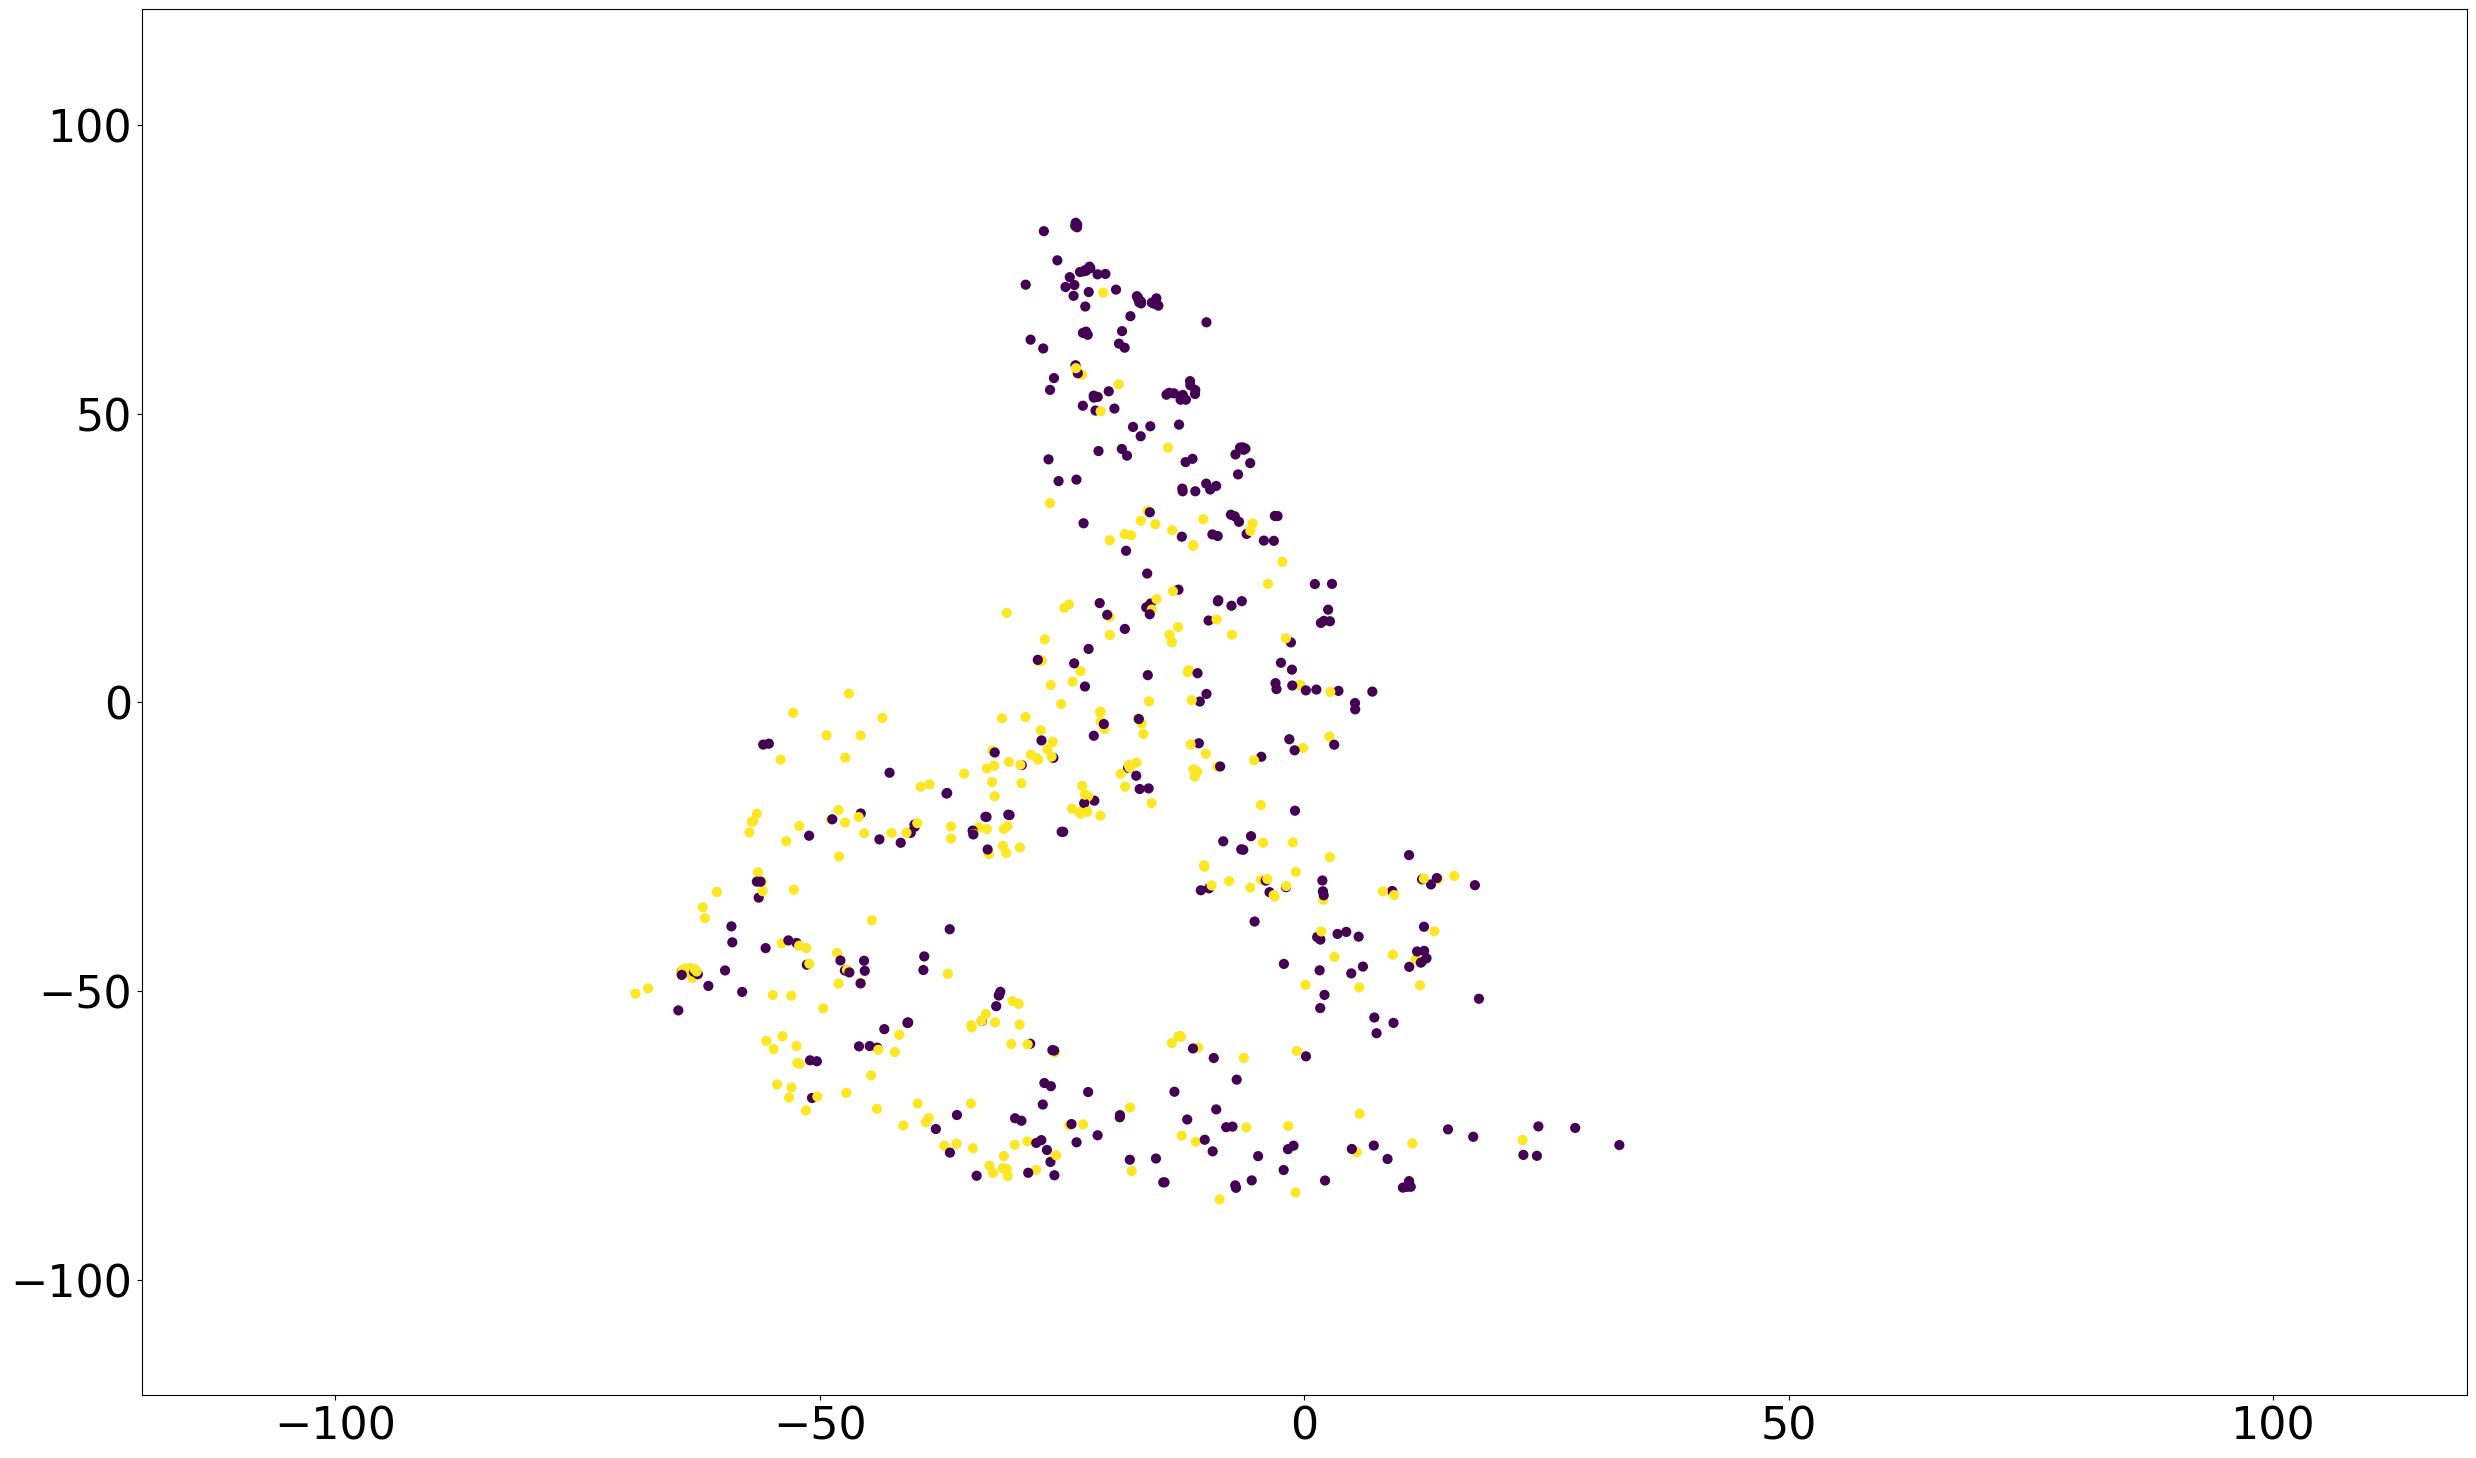

In [125]:
plt.scatter(X_embedded_global_clients[client_num][:, 0], X_embedded_global_clients[client_num][:, 1], c=labels_clients[client_num], s=40 )
plt.xlim(-120, 120)
plt.ylim(-120, 120)

In [126]:
"""
plt.scatter(X_embedded_global_clients[client_num][:, 0], X_embedded_global_clients[client_num][:, 1], c=labels_clients[client_num], )
plt.xlim(-110, 110)
plt.ylim(-100, 90)
plt.show()
"""

'\nplt.scatter(X_embedded_global_clients[client_num][:, 0], X_embedded_global_clients[client_num][:, 1], c=labels_clients[client_num], )\nplt.xlim(-110, 110)\nplt.ylim(-100, 90)\nplt.show()\n'

In [127]:
"""
plt.scatter(X_embedded_local_clients[client_num][:, 0], X_embedded_local_clients[client_num][:, 1], c=labels_clients[client_num], )
plt.xlim(-110, 110)
plt.ylim(-100, 90)
plt.show()
"""

'\nplt.scatter(X_embedded_local_clients[client_num][:, 0], X_embedded_local_clients[client_num][:, 1], c=labels_clients[client_num], )\nplt.xlim(-110, 110)\nplt.ylim(-100, 90)\nplt.show()\n'

In [128]:
"""
plt.scatter(X_embedded_local_global_clients[client_num][:, 0], X_embedded_local_global_clients[client_num][:, 1], c=labels_clients[client_num], )
plt.xlim(-110, 110)
plt.ylim(-100, 90)
plt.show()
"""

'\nplt.scatter(X_embedded_local_global_clients[client_num][:, 0], X_embedded_local_global_clients[client_num][:, 1], c=labels_clients[client_num], )\nplt.xlim(-110, 110)\nplt.ylim(-100, 90)\nplt.show()\n'

In [129]:
#import matplotlib.pyplot as plt
#fig = plt.figure(figsize=(30, 18))
#plt.rcParams["figure.figsize"] = (30,18)

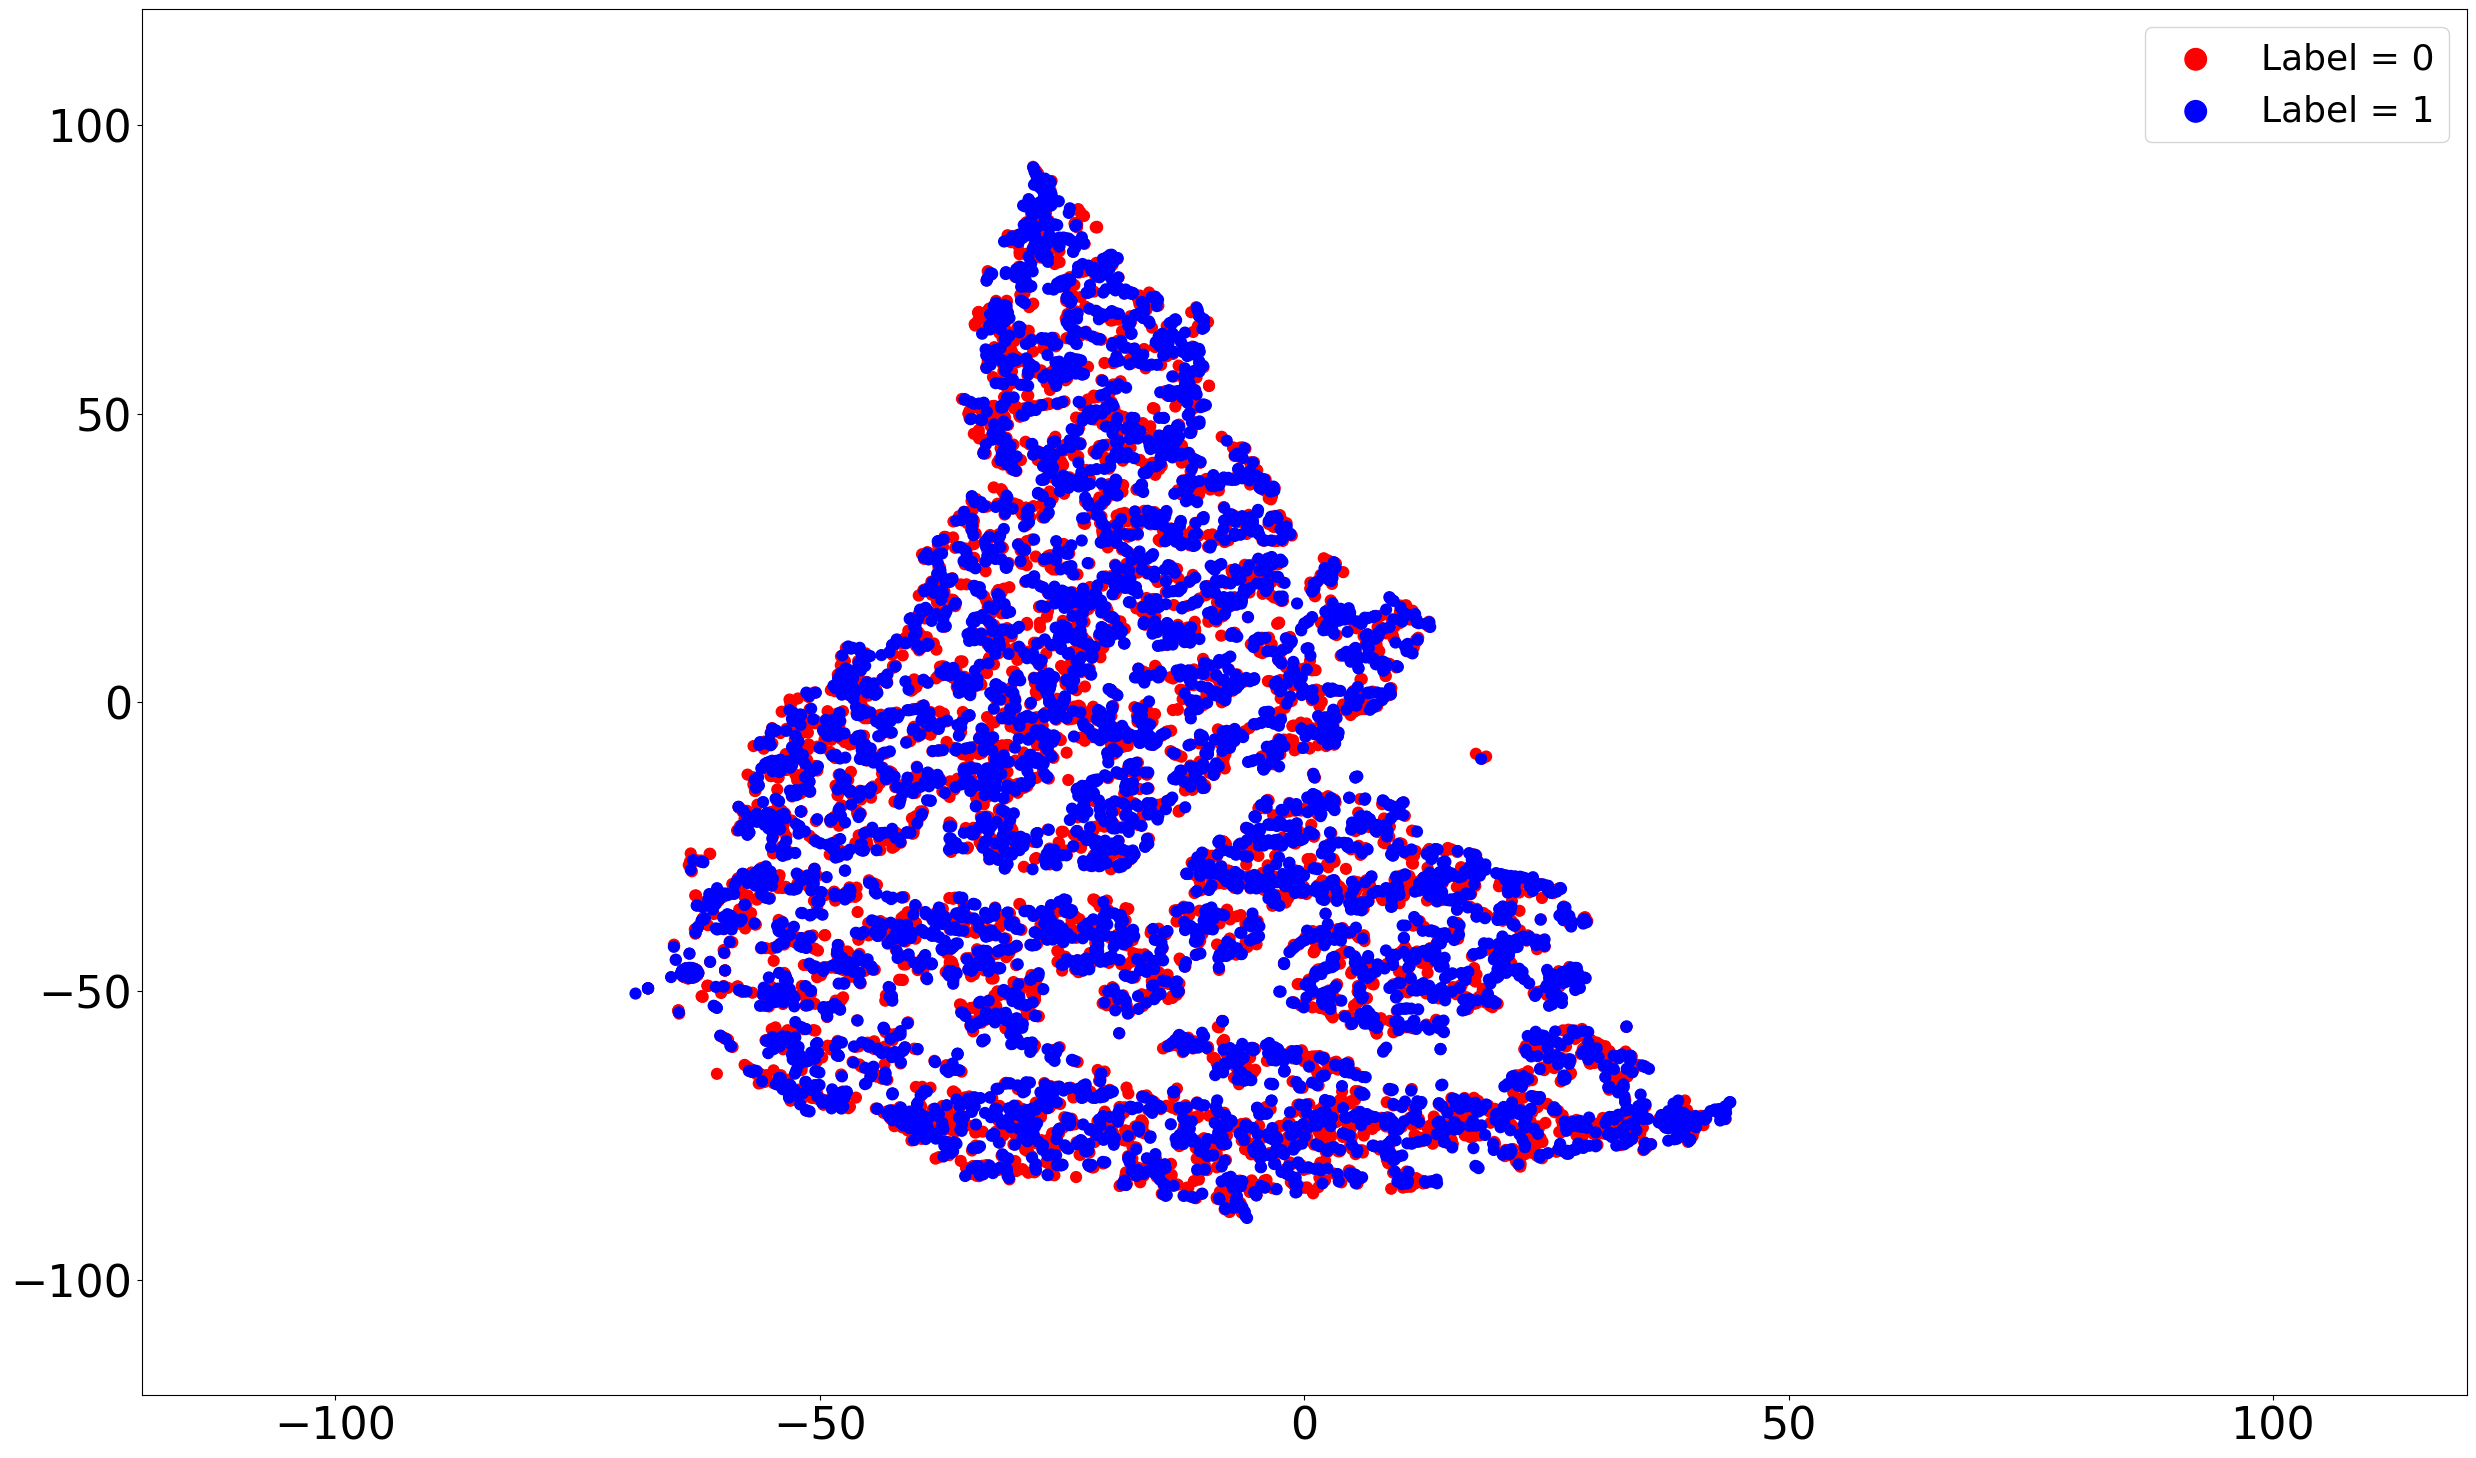

<Figure size 3000x1800 with 0 Axes>

In [130]:
colors=['red', 'blue']
for i in range(1+1):
    labels_use = labels_concat == i
    X_use = X_embedded_global[labels_use, :]
    plt.scatter(X_use[:, 0], X_use[:, 1], c=[colors[i]]*X_use.shape[0], label=f'Label = {i}', s=60)
plt.legend(prop={'size': 26}, markerscale=2)
plt.xlim(-120, 120)
plt.ylim(-120, 120)
plt.savefig(save_path + 'all_clients' + '_global')
plt.show()
plt.clf()

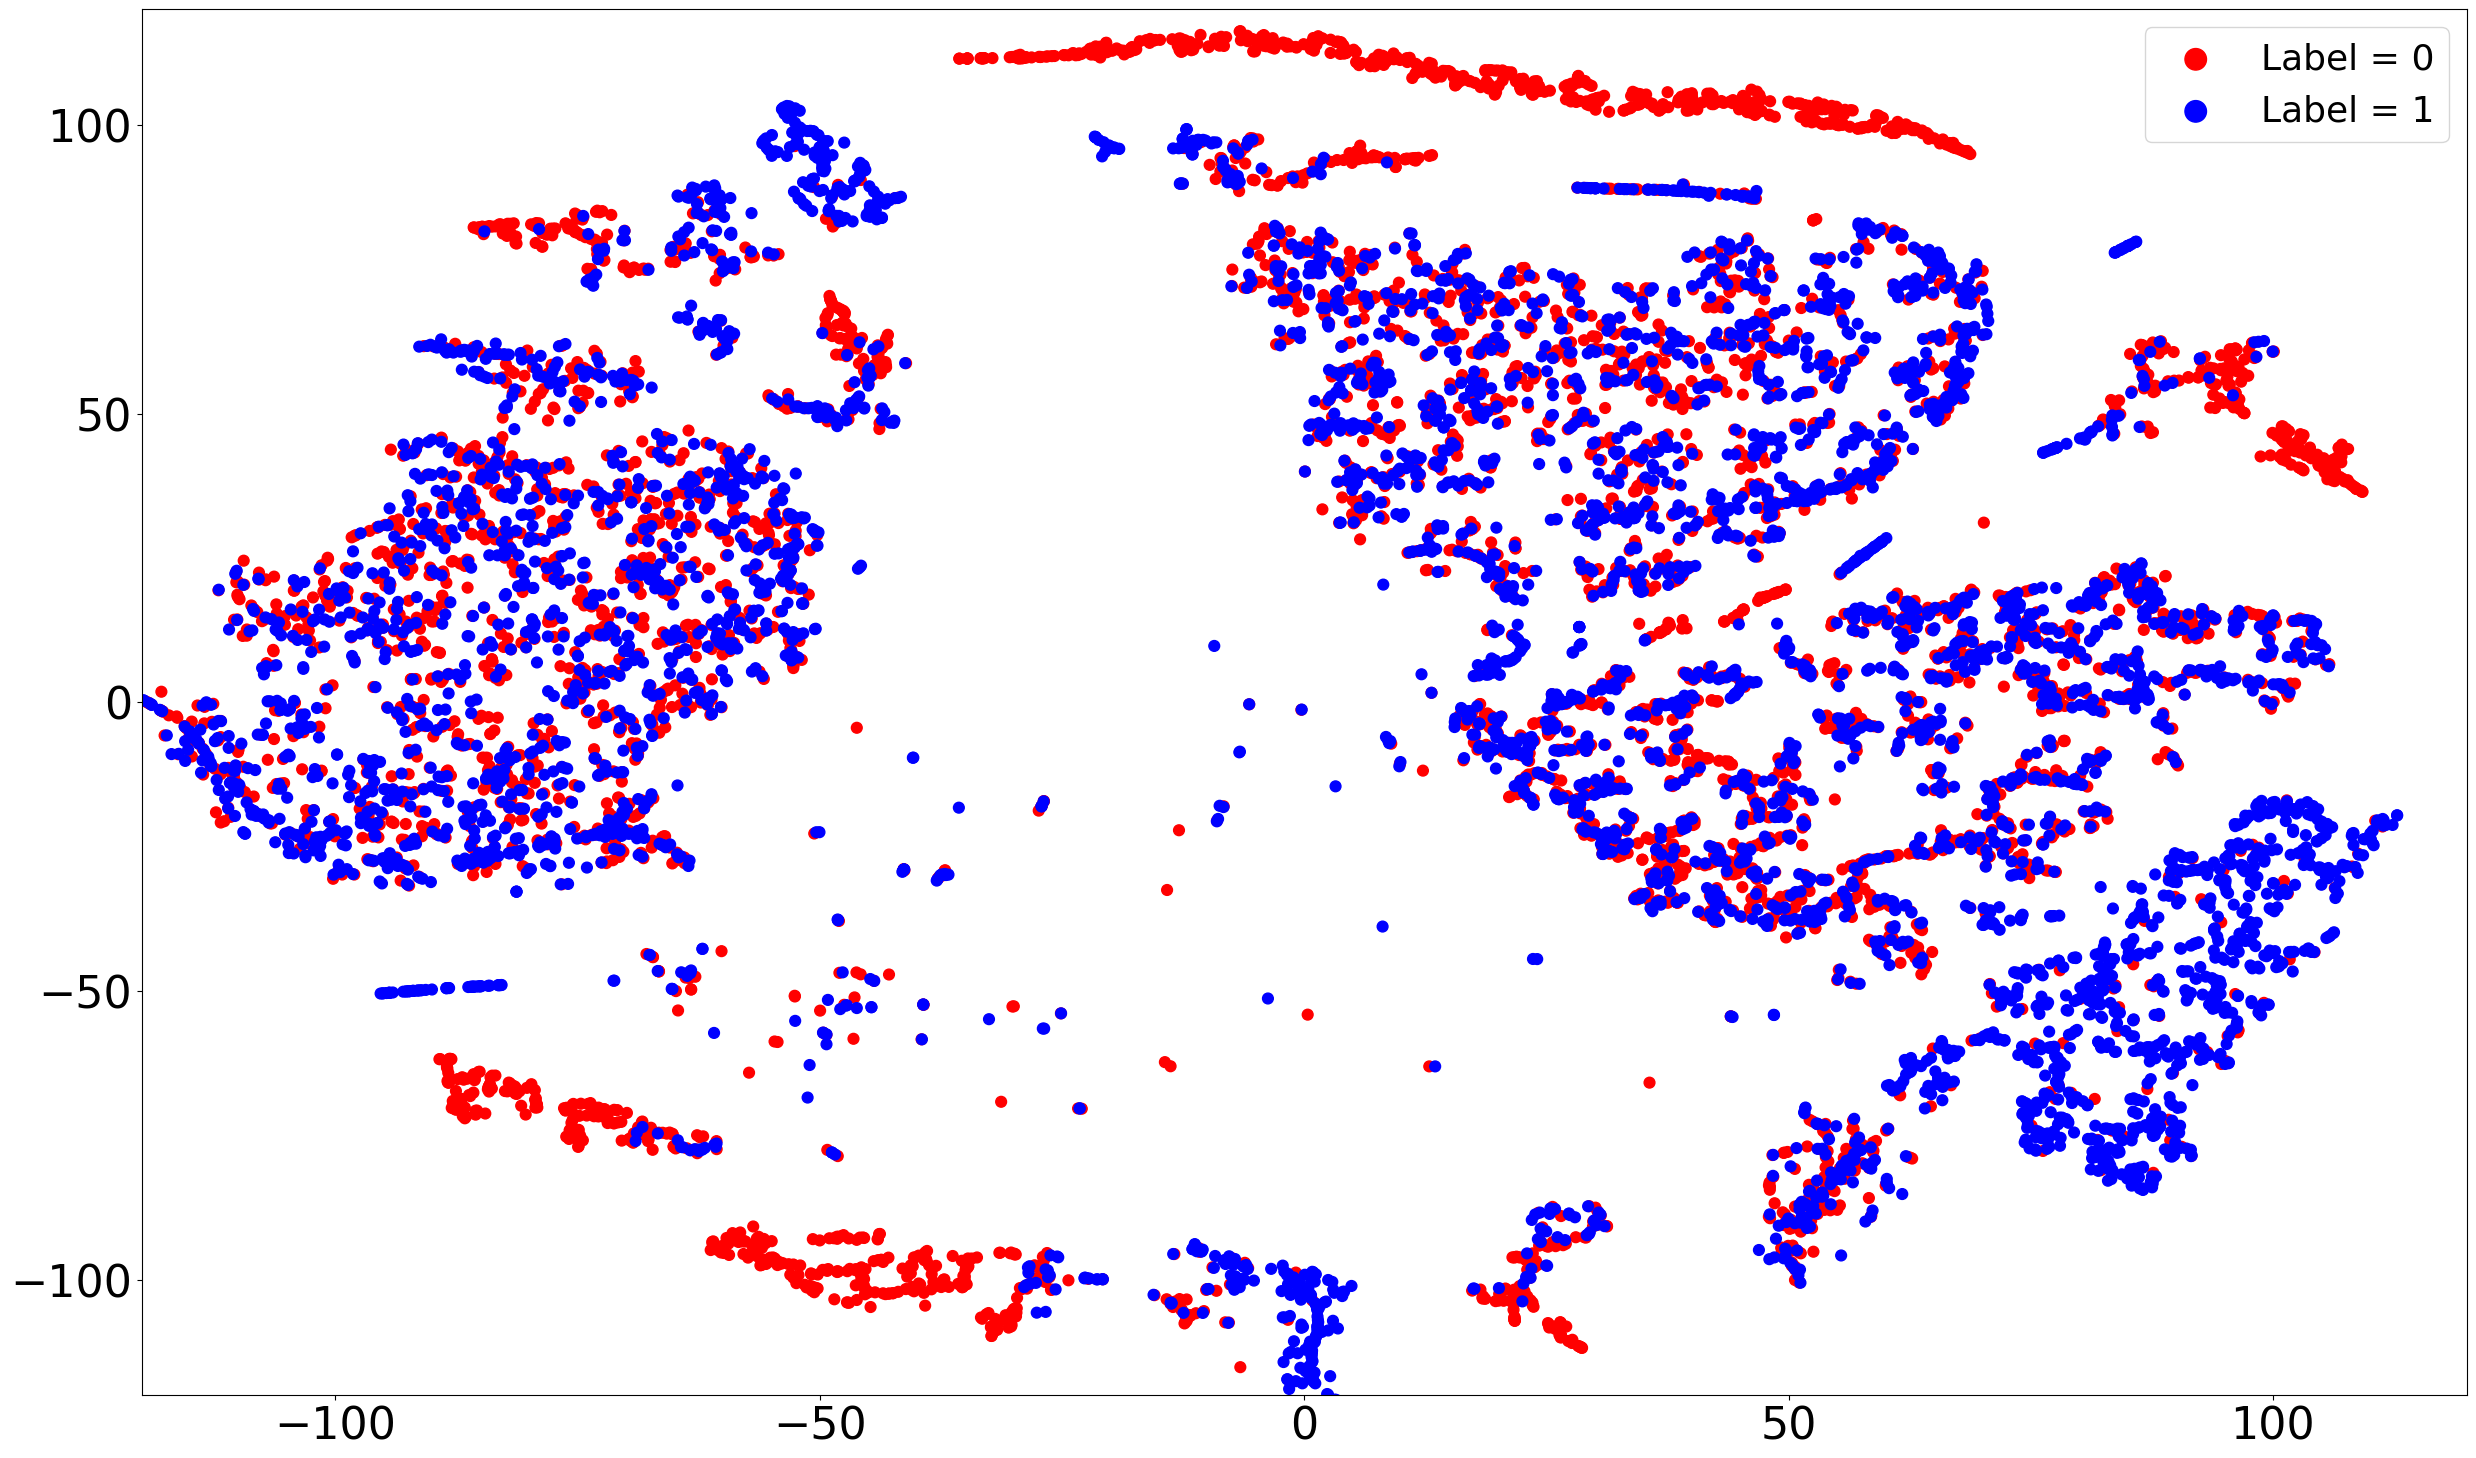

<Figure size 3000x1800 with 0 Axes>

In [131]:

colors=['red', 'blue']
for i in range(1+1):
    labels_use = labels_concat == i
    X_use = X_embedded_local[labels_use, :]
    plt.scatter(X_use[:, 0], X_use[:, 1], c=[colors[i]]*X_use.shape[0], label=f'Label = {i}', s=60)
plt.legend(prop={'size': 26}, markerscale=2)
plt.xlim(-120, 120)
plt.ylim(-120, 120)
plt.savefig(save_path + 'all_clients' + '_local')
plt.show()
plt.clf()

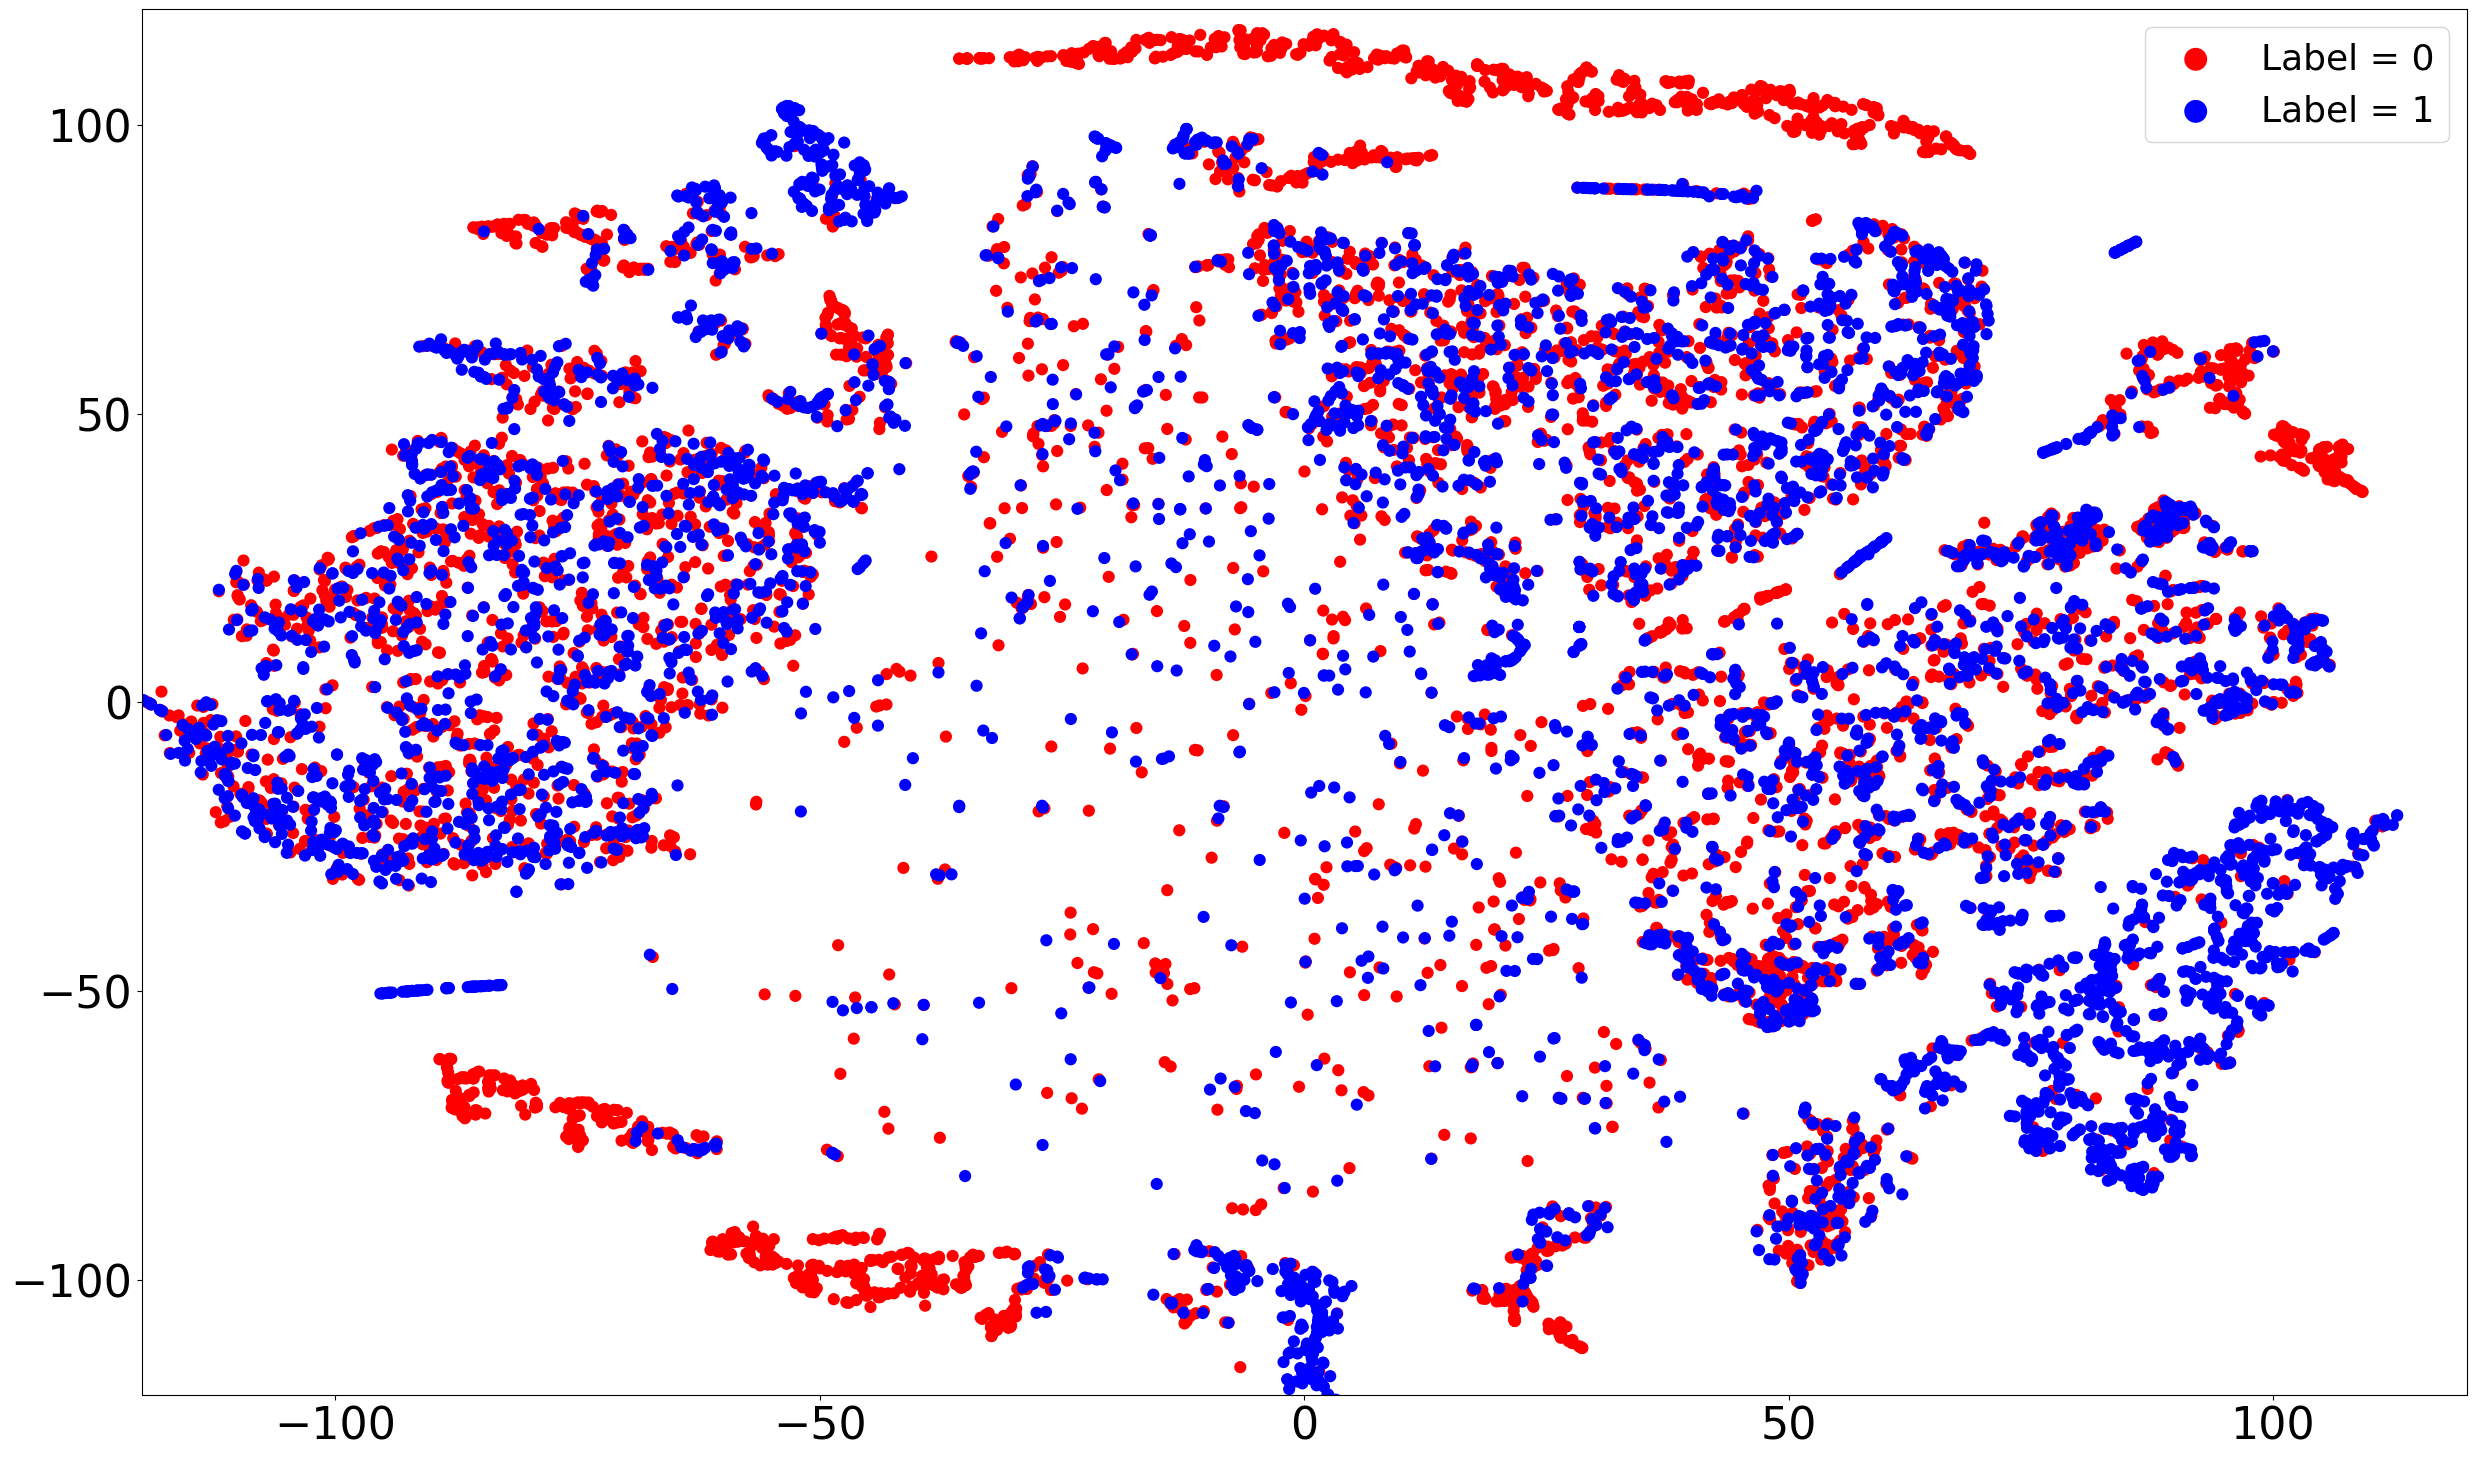

<Figure size 3000x1800 with 0 Axes>

In [132]:
colors=['red', 'blue']
for i in range(1+1):
    labels_use = labels_concat == i
    X_use = X_embedded_local_global[labels_use, :]
    plt.scatter(X_use[:, 0], X_use[:, 1], c=[colors[i]]*X_use.shape[0], label=f'Label = {i}', s=60)
plt.legend(prop={'size': 26}, markerscale=2)
plt.xlim(-120, 120)
plt.ylim(-120, 120)
plt.savefig(save_path + 'all_clients' + '_local_global')
plt.show()
plt.clf()

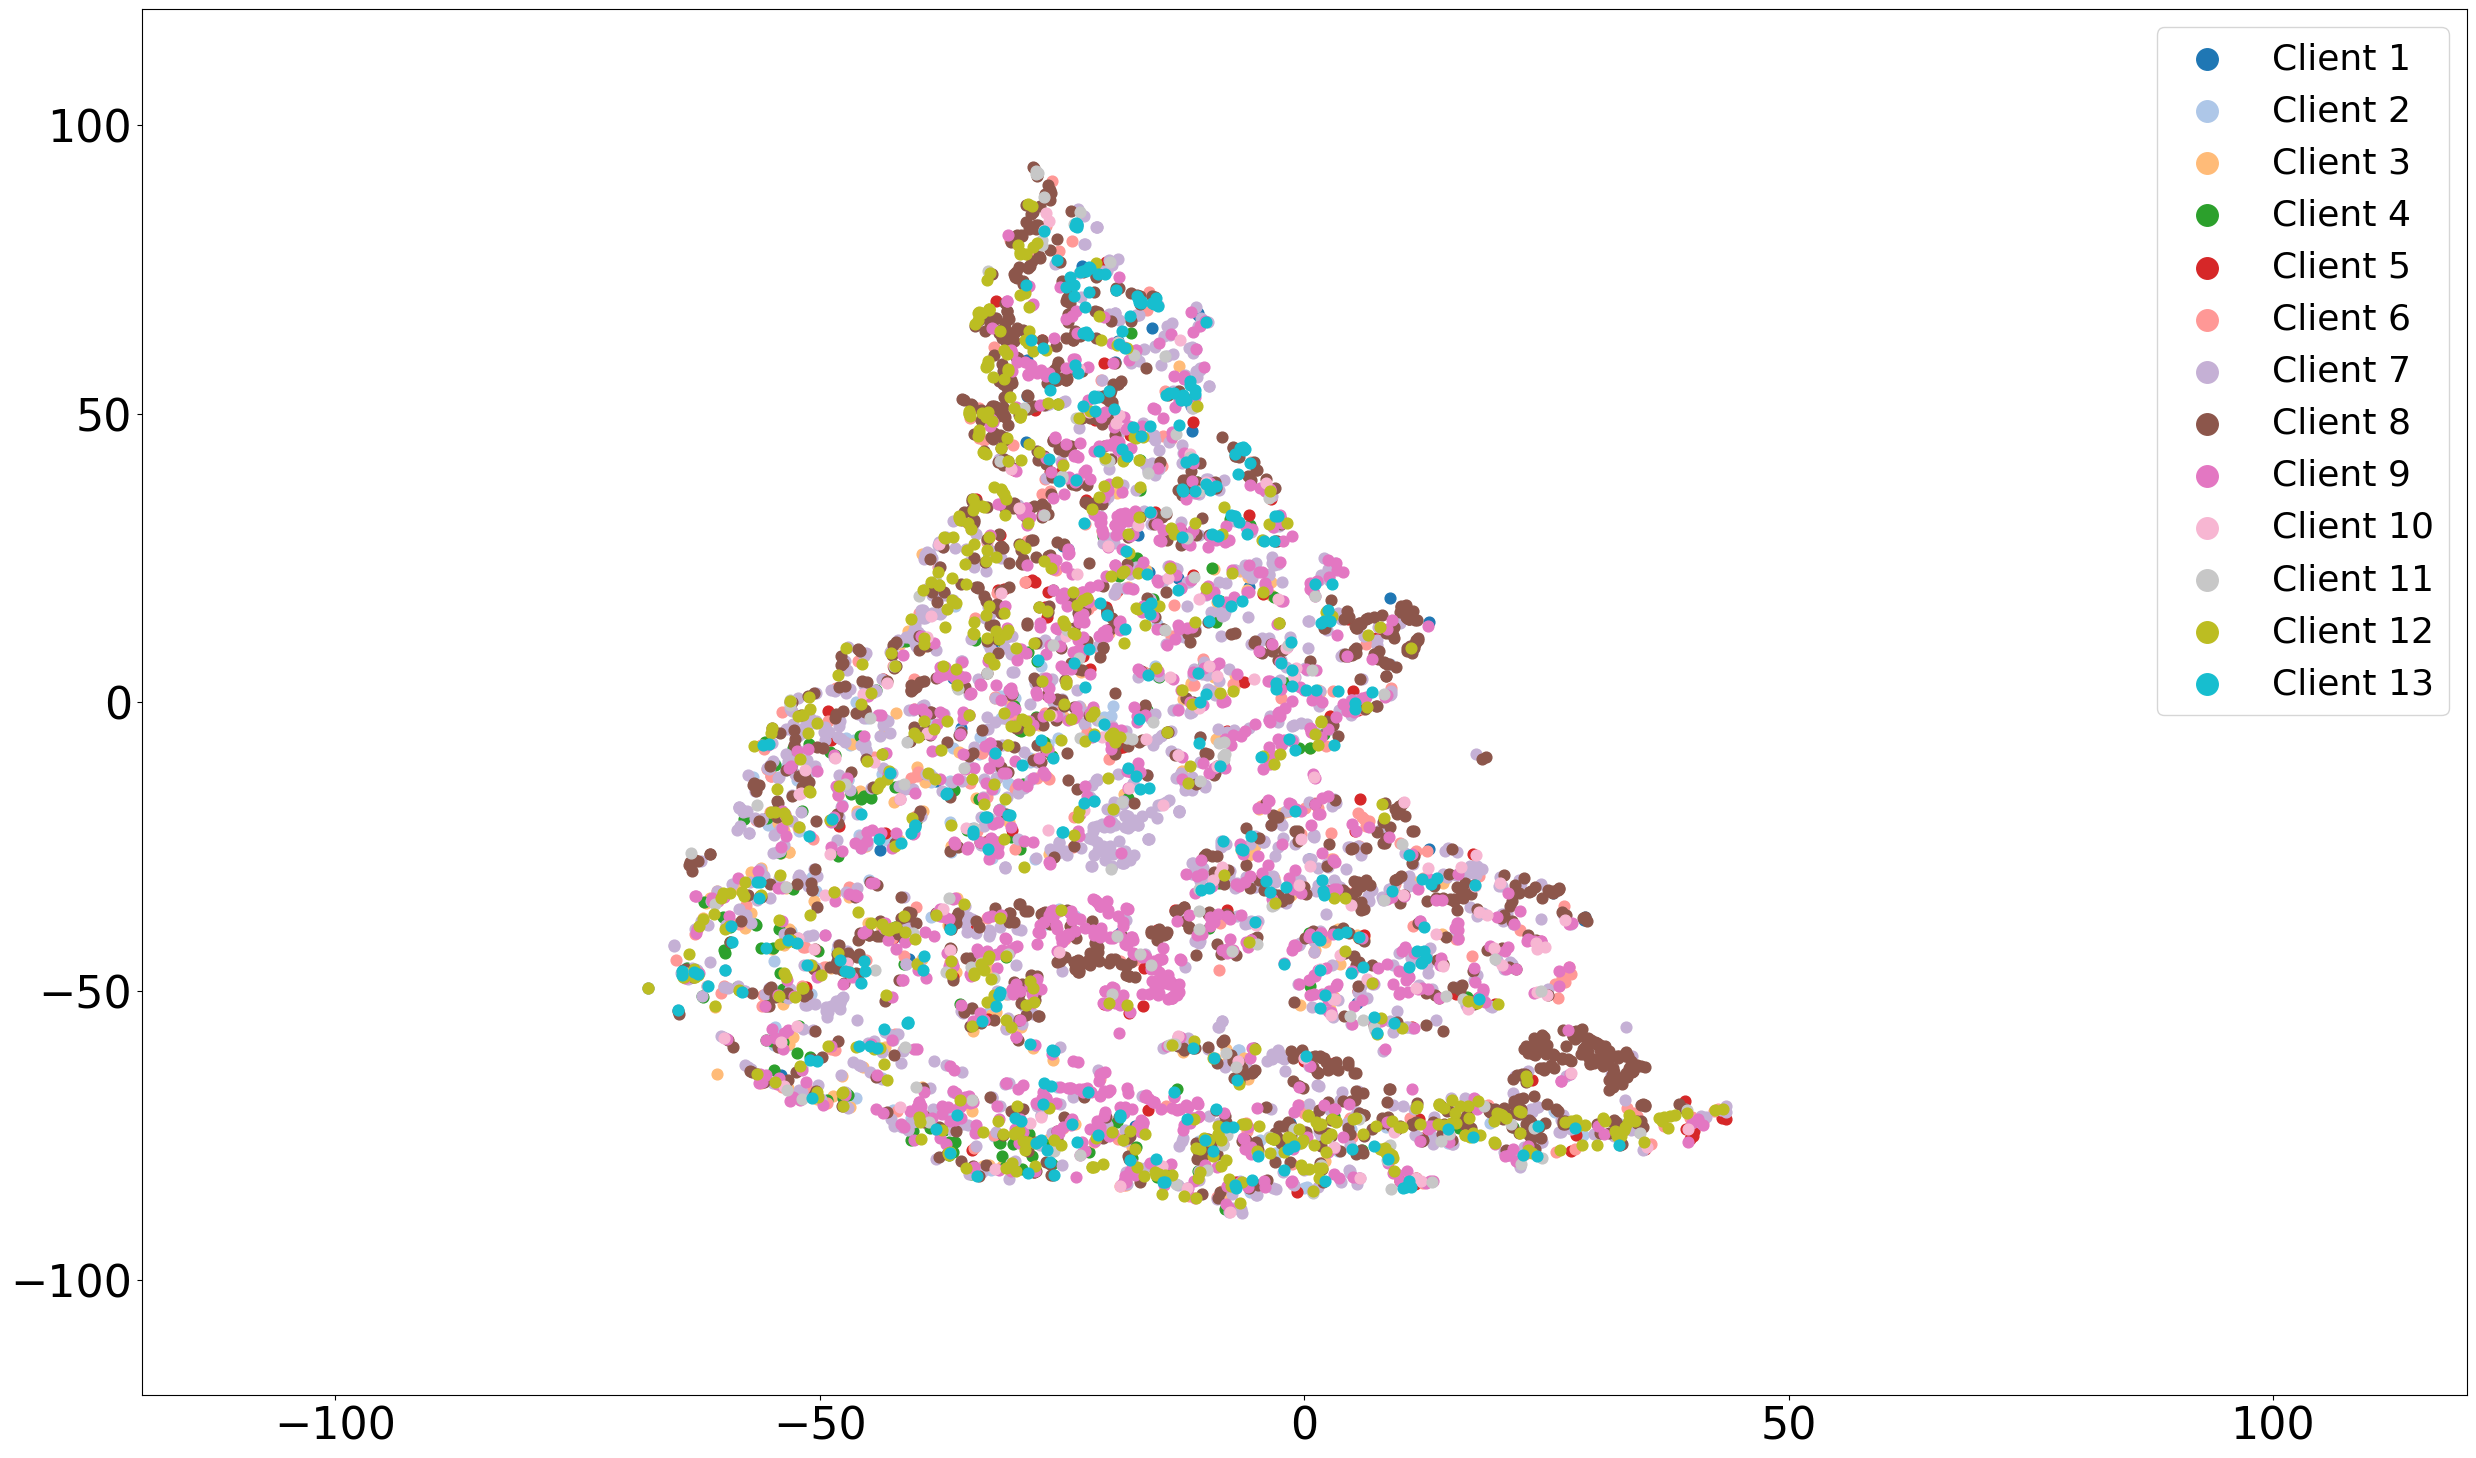

In [133]:

colors = []
NUM_COLORS = 13
cm = plt.get_cmap('tab20')
colors_use = list(map(cm, colors))
fig = plt.figure()
for client in range(1, client_num+1):
    data_size = X_embedded_global_clients[client].shape[0]
    colors_curr = data_size*[client]
    colors += colors_curr

ax = fig.add_subplot(111)
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

for client in range(1, client_num+1):
    labels_0 = labels_clients[client] == 0
    X_embedded_global_clients_only_label_0 = X_embedded_global_clients[client][labels_0, :]
    ax.scatter(X_embedded_global_clients_only_label_0[:,0], X_embedded_global_clients_only_label_0[:,1], label = f'Client {client}', s=60)



#ax.legend_elements()
ax.legend(prop={'size': 26}, markerscale=2)

plt.xlim(-120, 120)
plt.ylim(-120, 120)
plt.savefig(save_path + 'global_comparison_label_0')

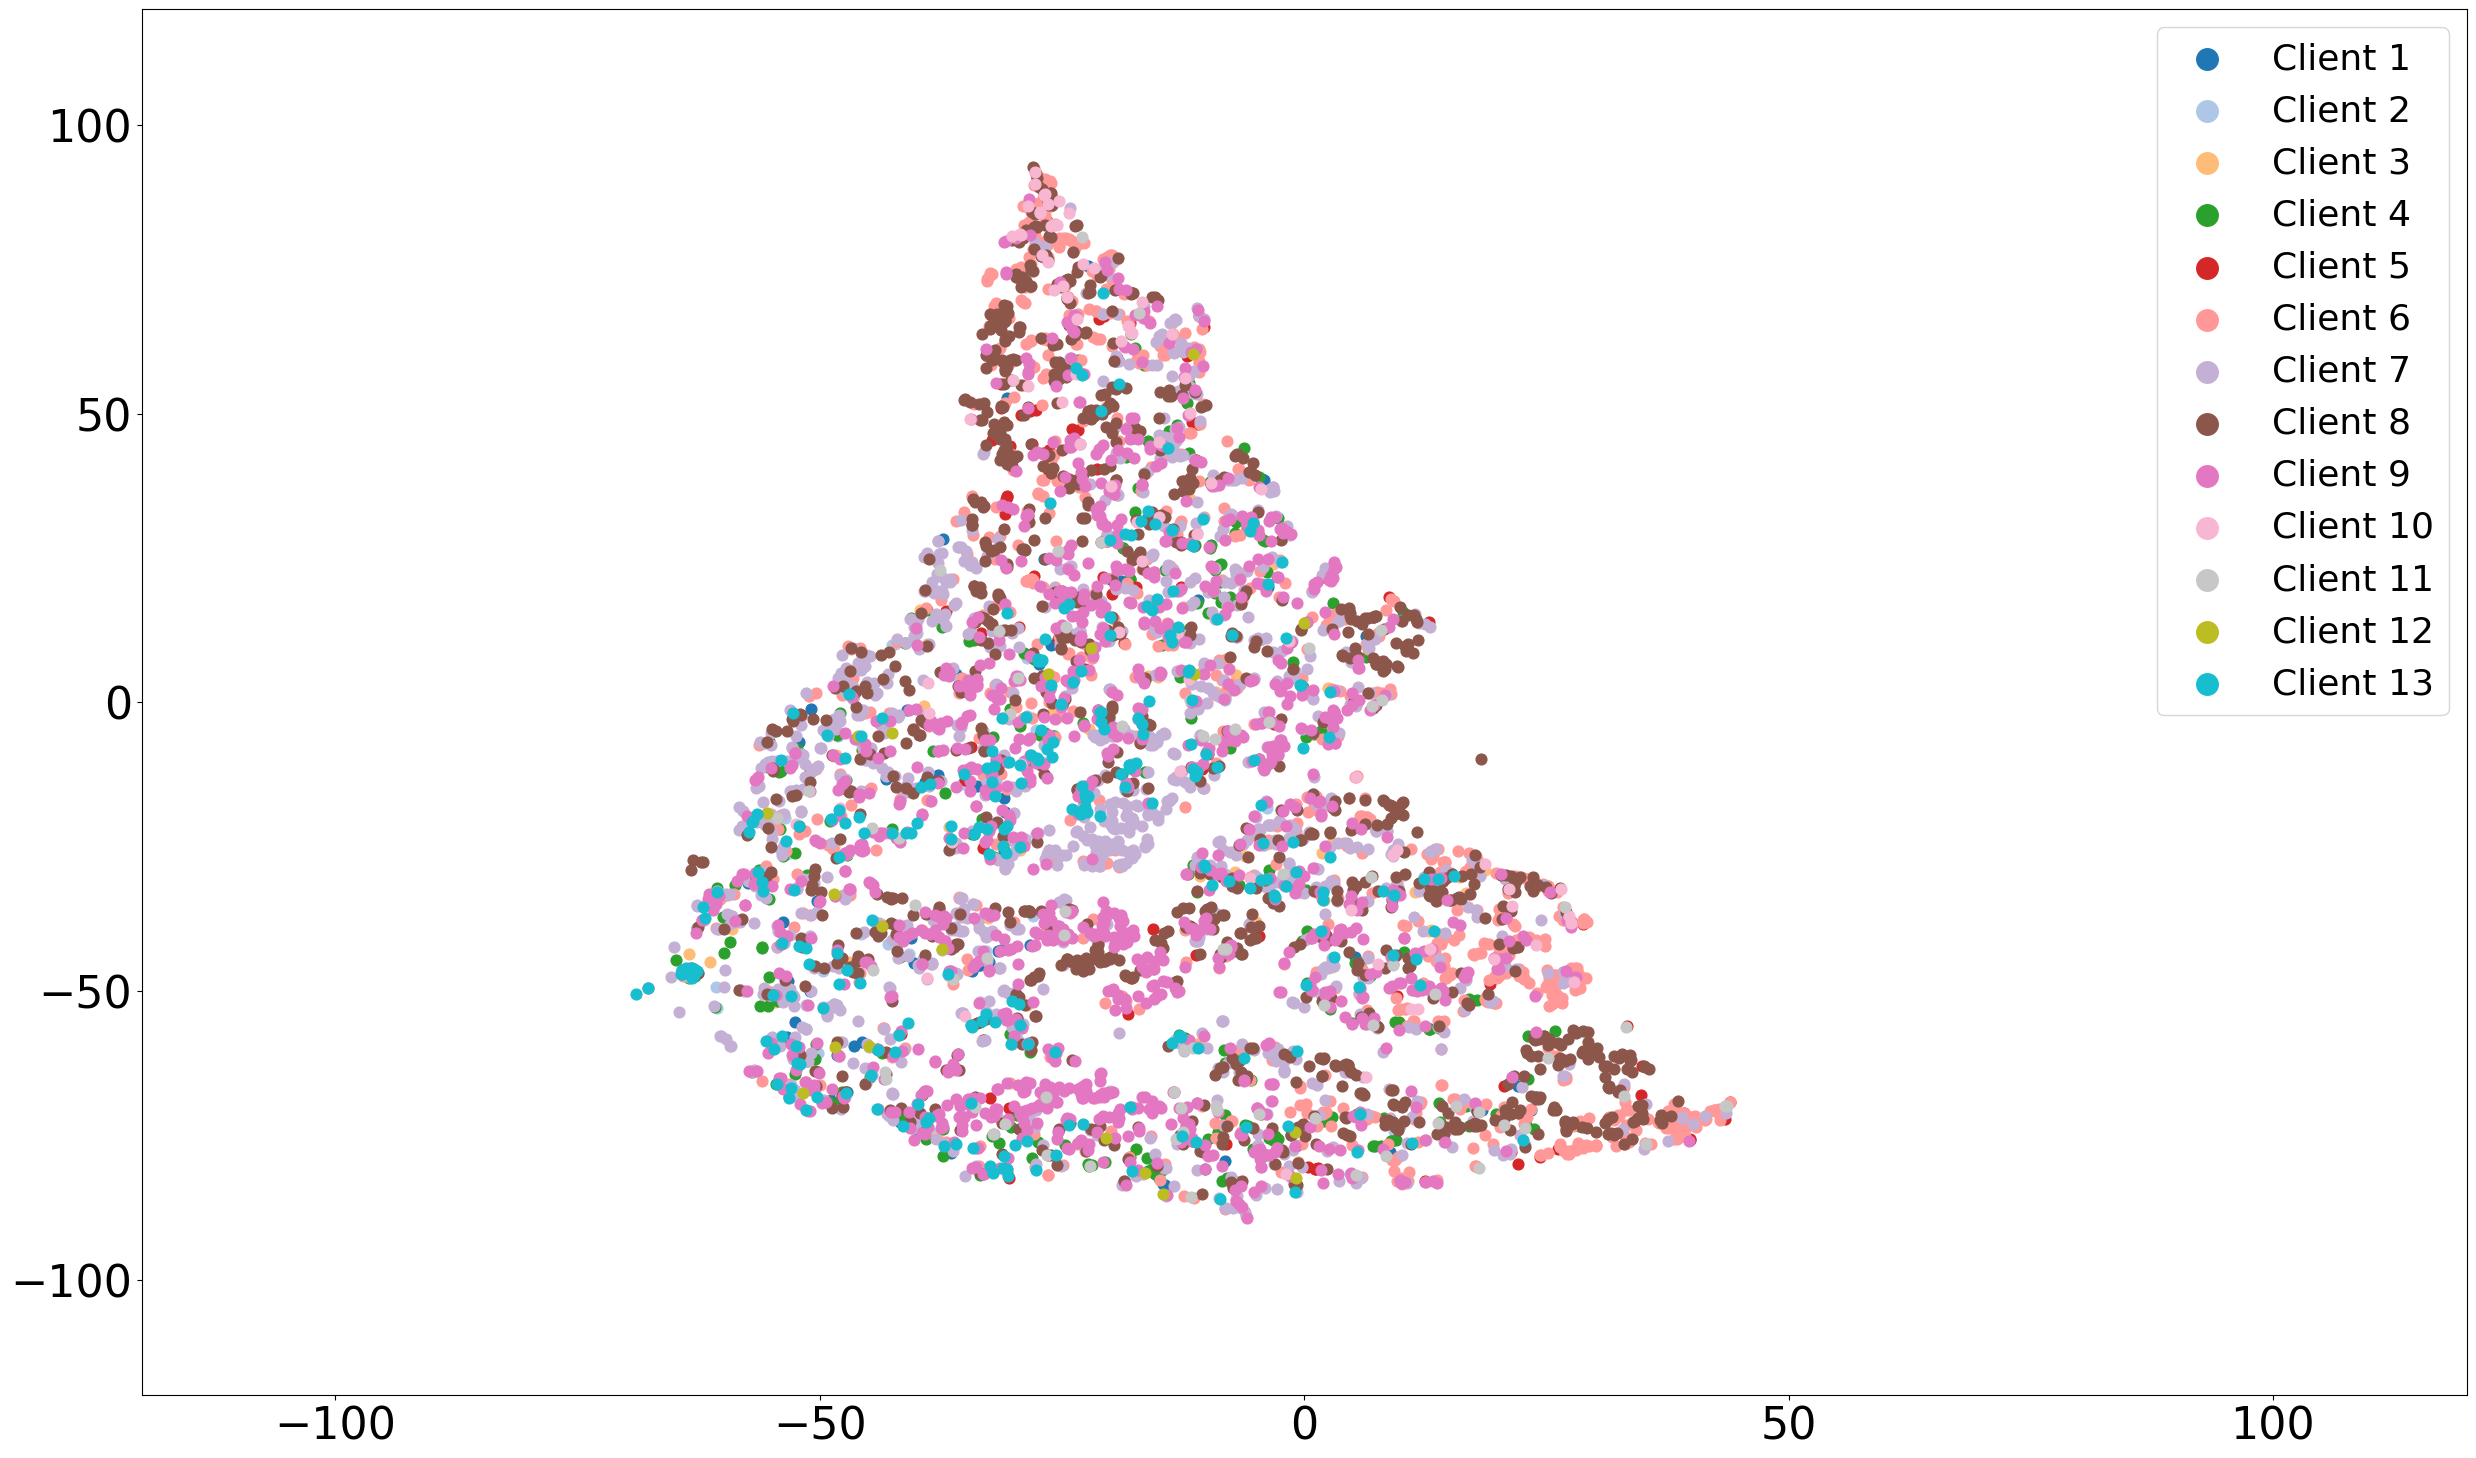

In [134]:

colors = []
NUM_COLORS = 13
cm = plt.get_cmap('tab20')
colors_use = list(map(cm, colors))
fig = plt.figure()
for client in range(1, client_num+1):
    data_size = X_embedded_global_clients[client].shape[0]
    colors_curr = data_size*[client]
    colors += colors_curr

ax = fig.add_subplot(111)
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

for client in range(1, client_num+1):
    labels_1 = labels_clients[client] == 1
    X_embedded_global_clients_only_label_1 = X_embedded_global_clients[client][labels_1, :]
    ax.scatter(X_embedded_global_clients_only_label_1[:,0], X_embedded_global_clients_only_label_1[:,1], label = f'Client {client}', s=60)



#ax.legend_elements()
ax.legend(prop={'size': 26}, markerscale=2)

plt.xlim(-120, 120)
plt.ylim(-120, 120)
plt.savefig(save_path + 'global_comparison_label_1')

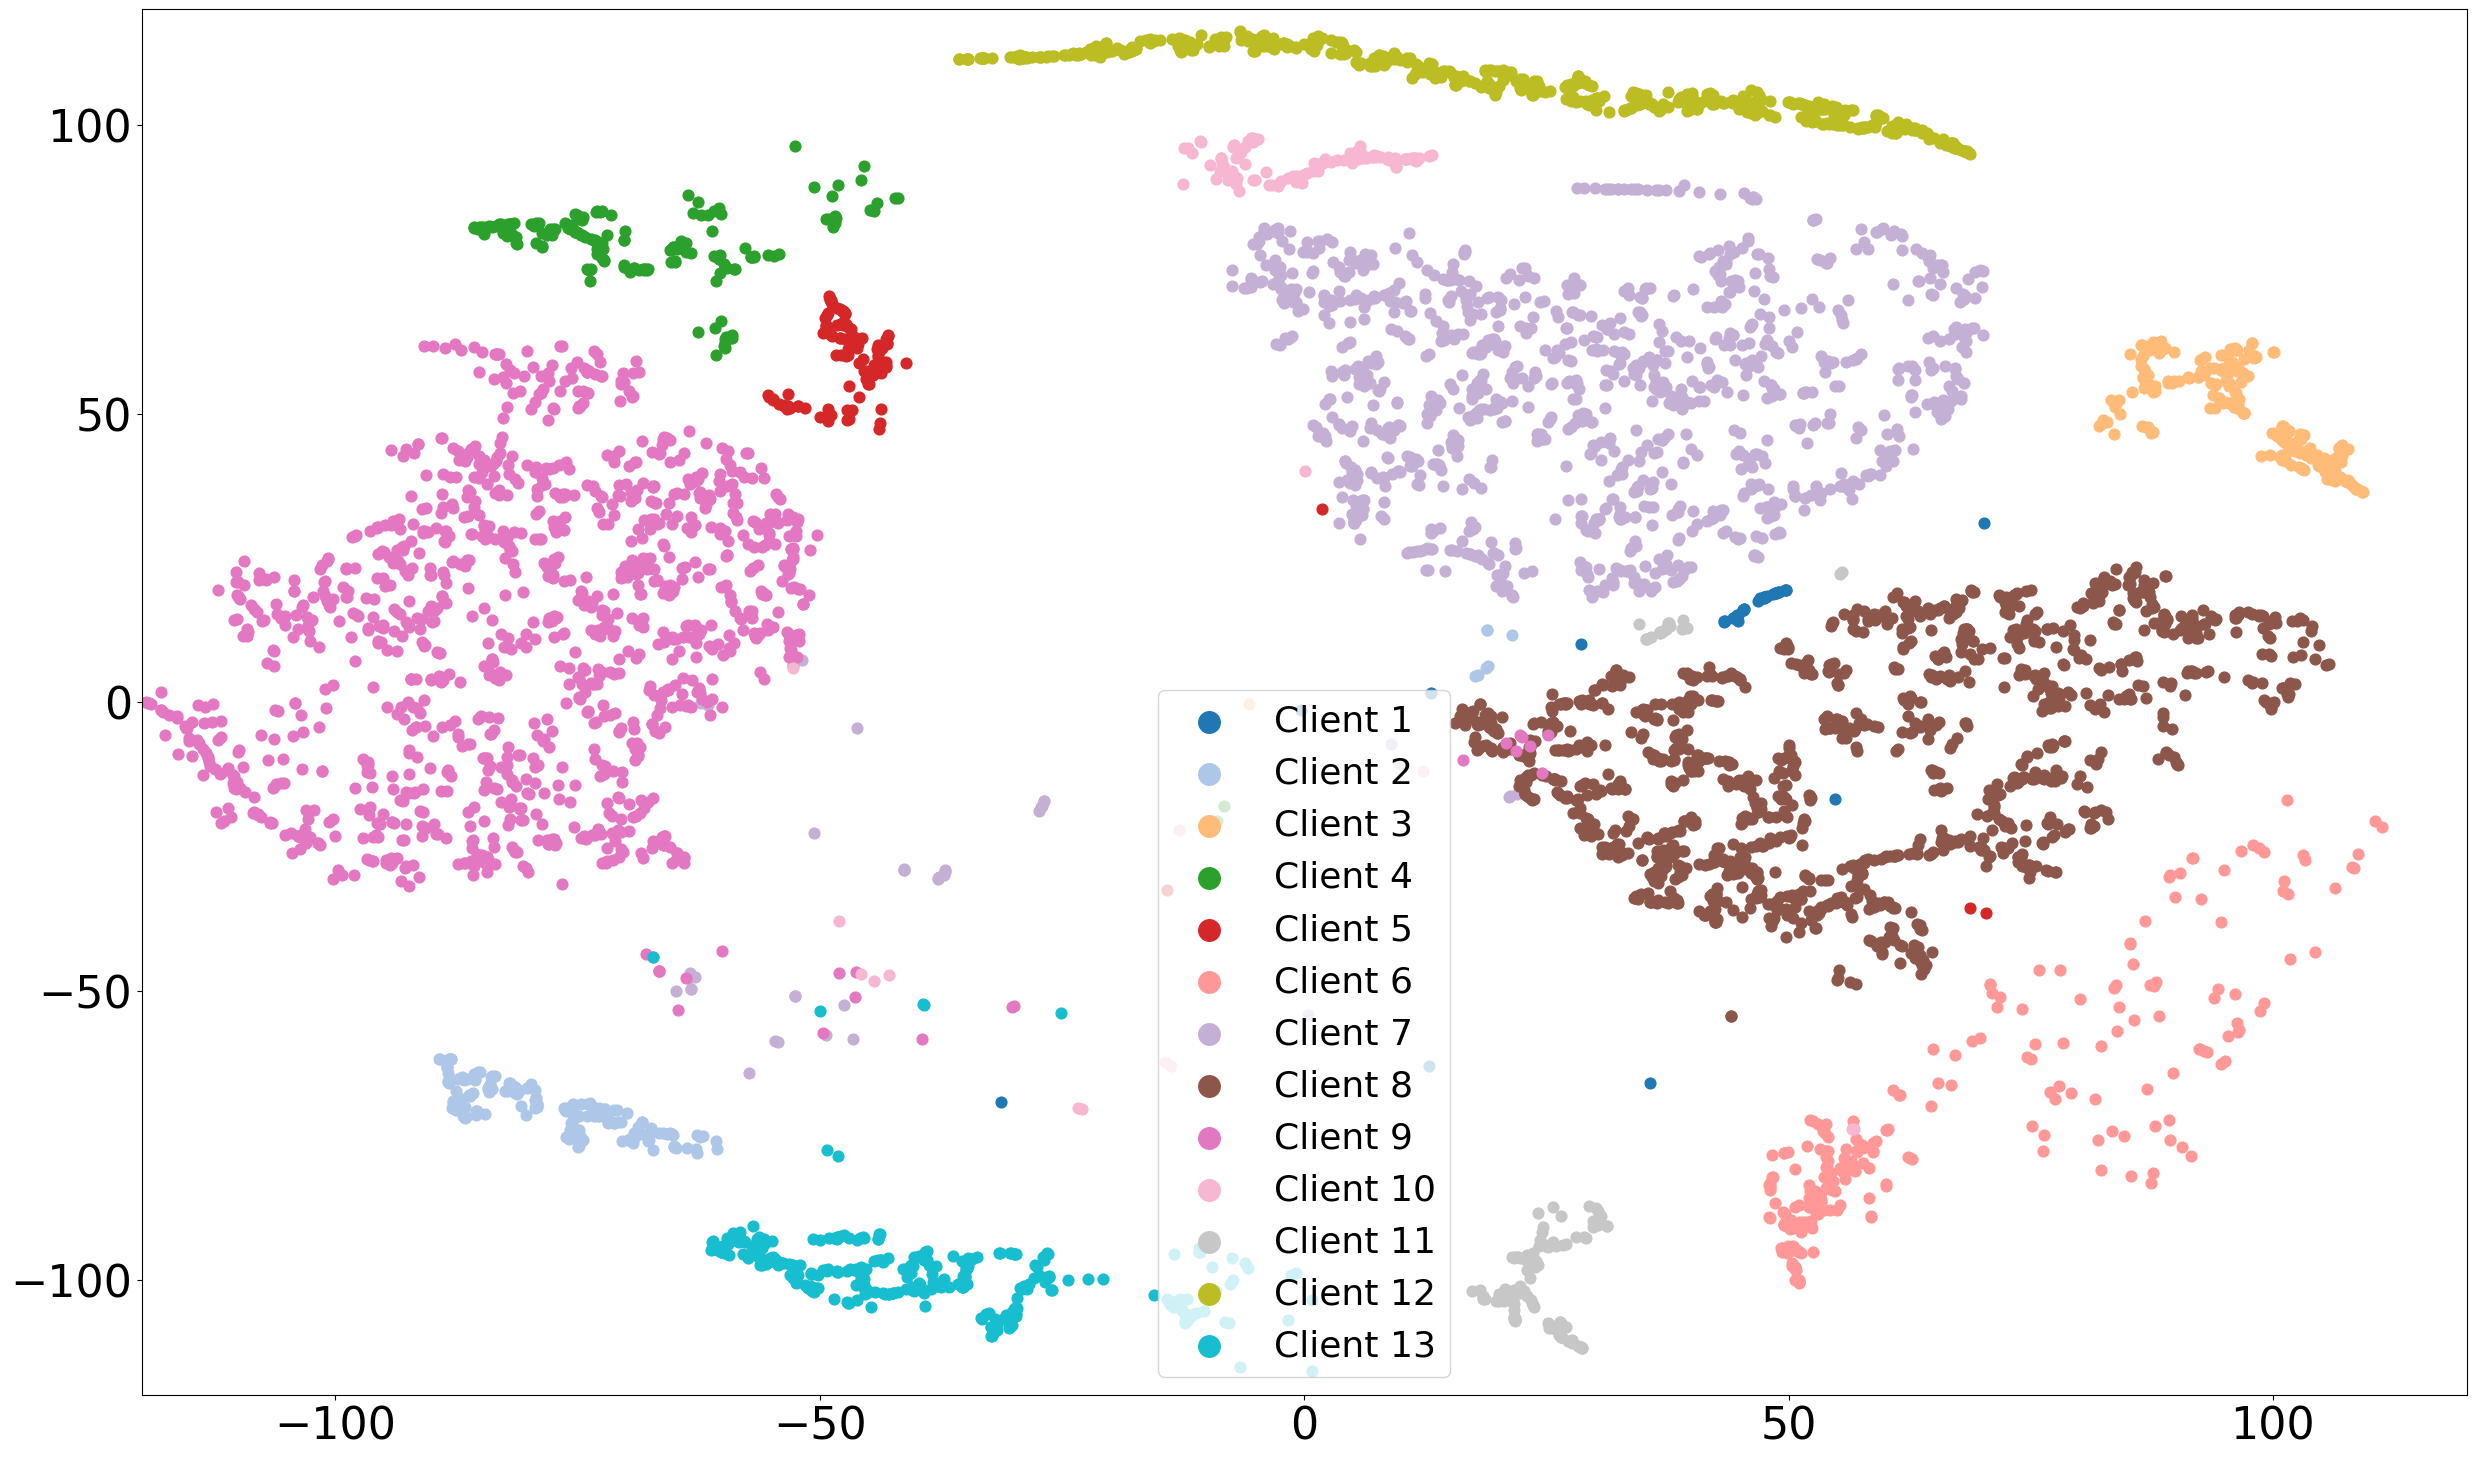

In [135]:

colors = []
NUM_COLORS = 13
cm = plt.get_cmap('tab20')
colors_use = list(map(cm, colors))
fig = plt.figure()
for client in range(1, client_num+1):
    data_size = X_embedded_local_clients[client].shape[0]
    colors_curr = data_size*[client]
    colors += colors_curr

ax = fig.add_subplot(111)
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

for client in range(1, client_num+1):
    labels_0 = labels_clients[client] == 0
    X_embedded_local_clients_only_label_0 = X_embedded_local_clients[client][labels_0, :]
    ax.scatter(X_embedded_local_clients_only_label_0[:,0], X_embedded_local_clients_only_label_0[:,1], label = f'Client {client}', s=60)



#ax.legend_elements()
ax.legend(prop={'size': 26}, markerscale=2)

plt.xlim(-120, 120)
plt.ylim(-120, 120)
plt.savefig(save_path + 'local_comparison_label_0')

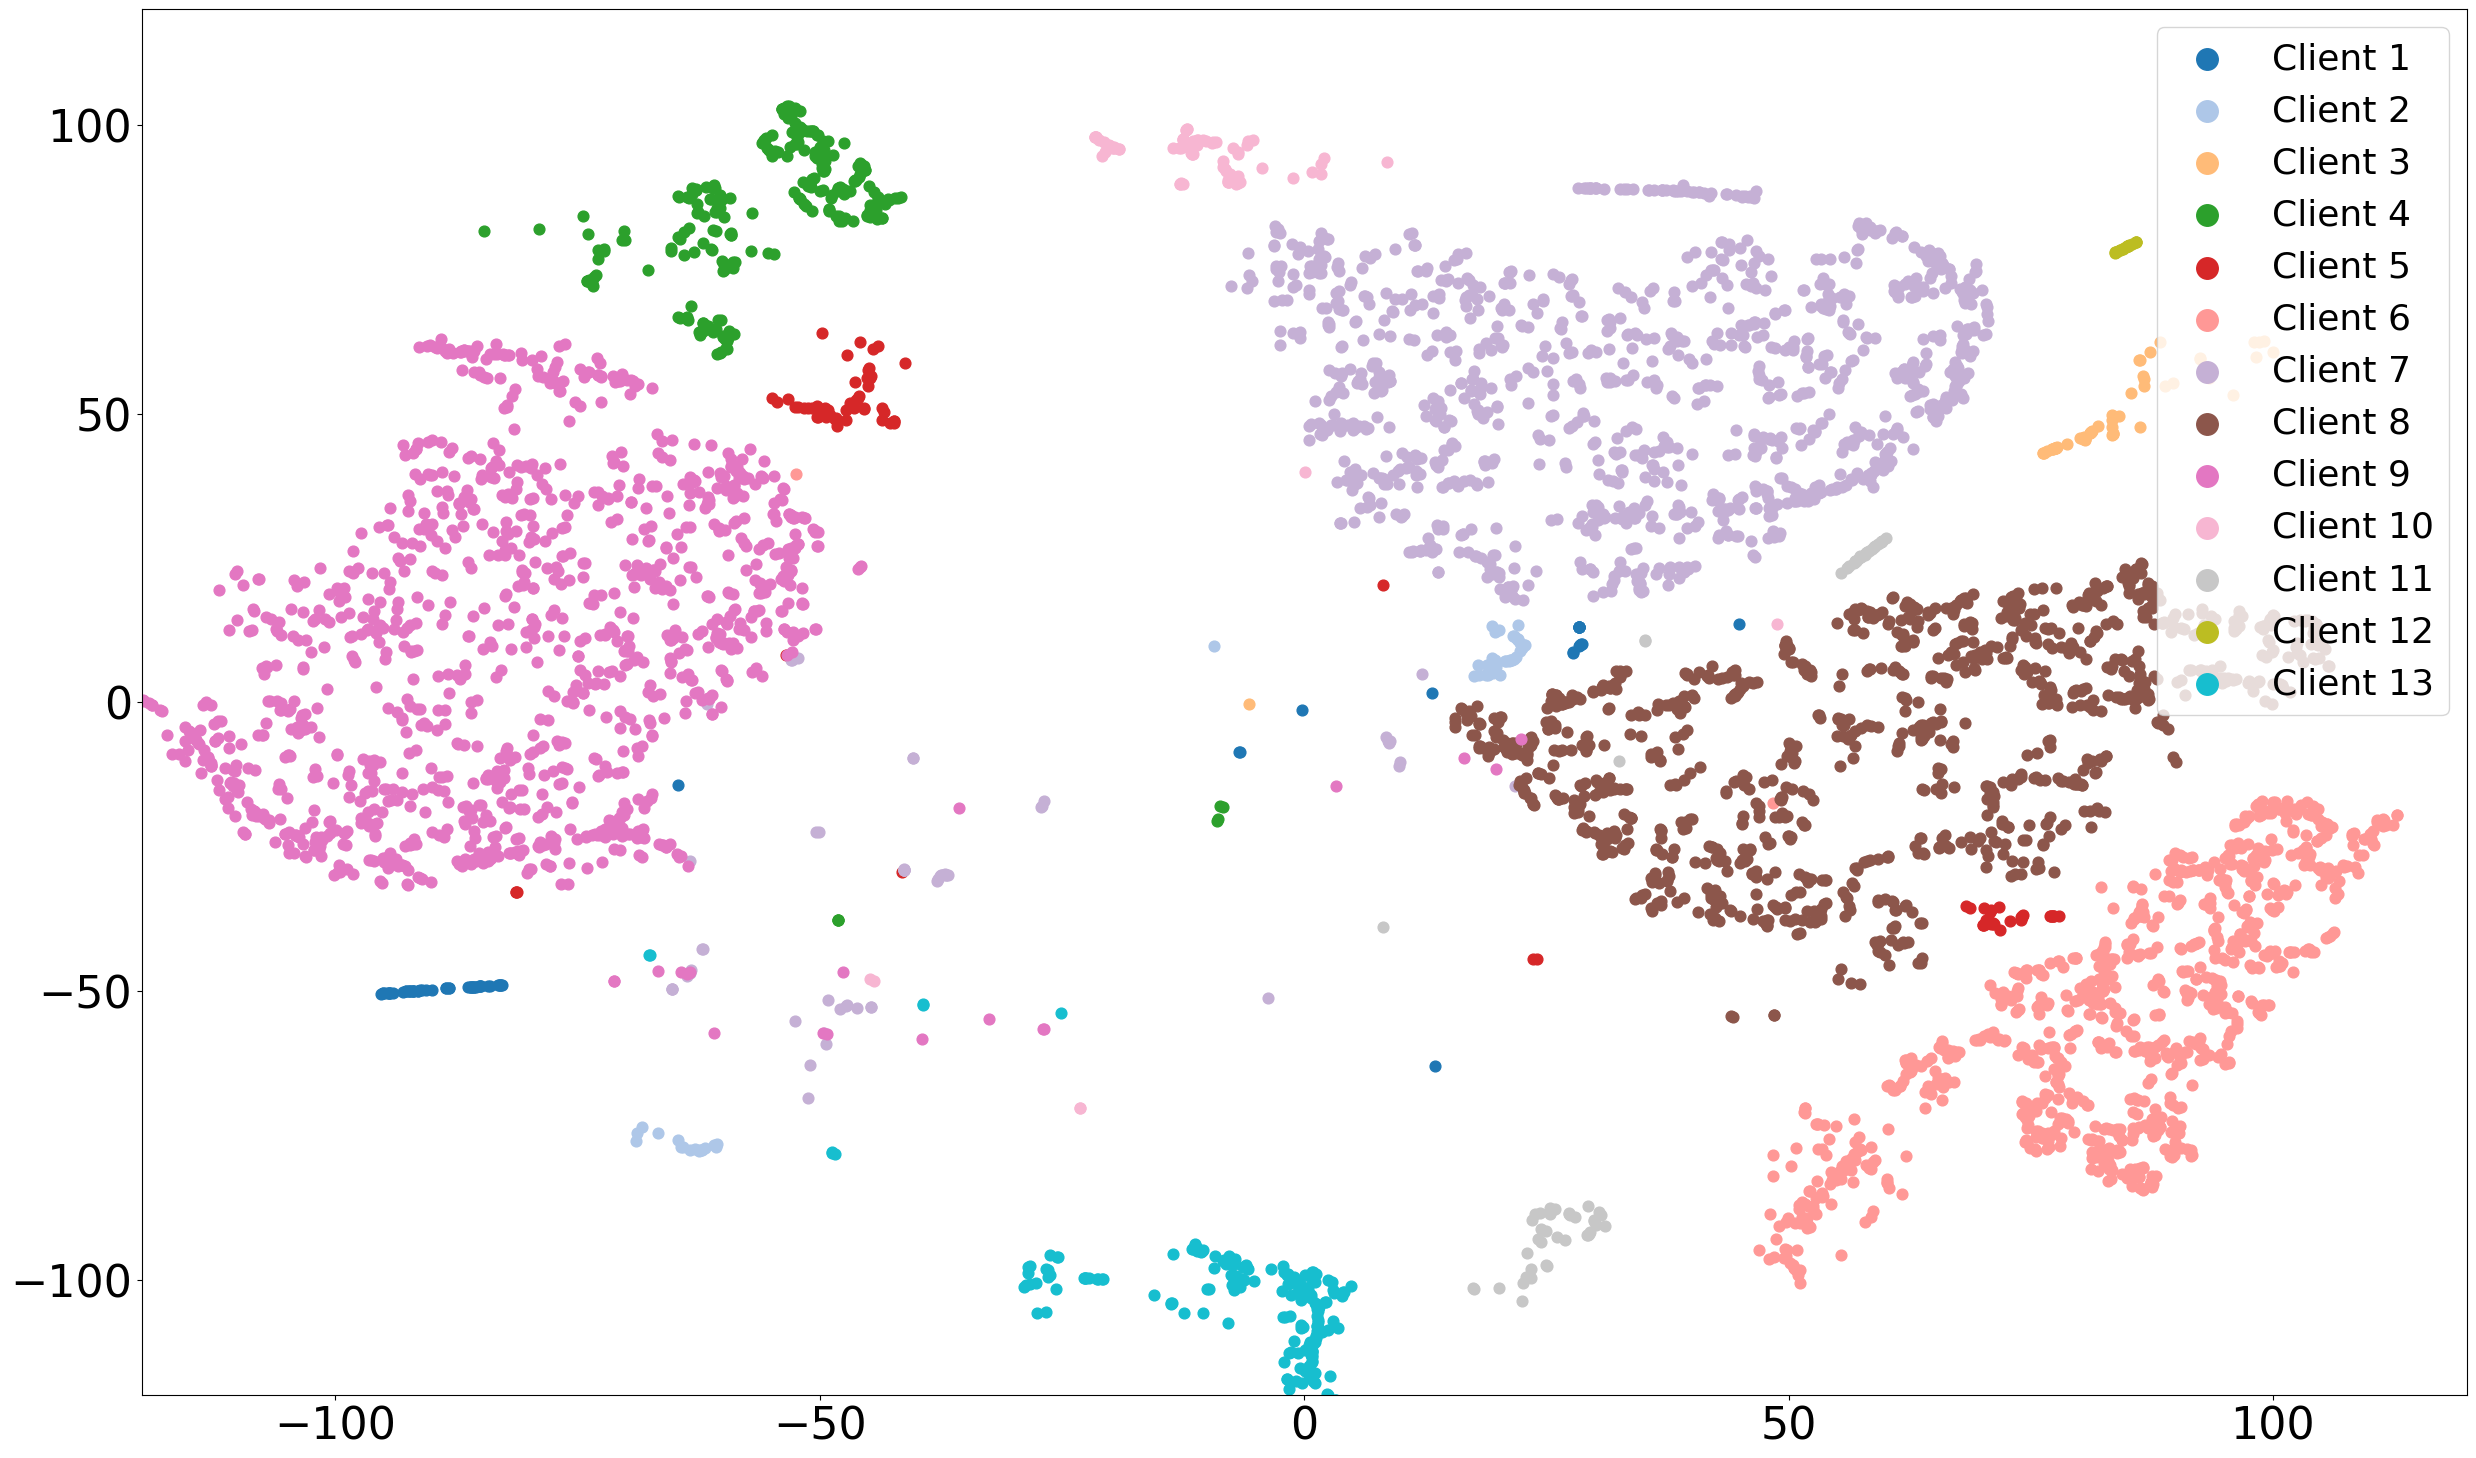

In [136]:

colors = []
NUM_COLORS = 13
cm = plt.get_cmap('tab20')
colors_use = list(map(cm, colors))
fig = plt.figure()
for client in range(1, client_num+1):
    data_size = X_embedded_local_clients[client].shape[0]
    colors_curr = data_size*[client]
    colors += colors_curr

ax = fig.add_subplot(111)
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

for client in range(1, client_num+1):
    labels_0 = labels_clients[client] == 1
    X_embedded_local_clients_only_label_0 = X_embedded_local_clients[client][labels_0, :]
    ax.scatter(X_embedded_local_clients_only_label_0[:,0], X_embedded_local_clients_only_label_0[:,1], label = f'Client {client}', s=60)



#ax.legend_elements()
ax.legend(prop={'size': 26}, markerscale=2)
plt.xlim(-120, 120)
plt.ylim(-120, 120)
plt.savefig(save_path + 'local_comparison_label_1')

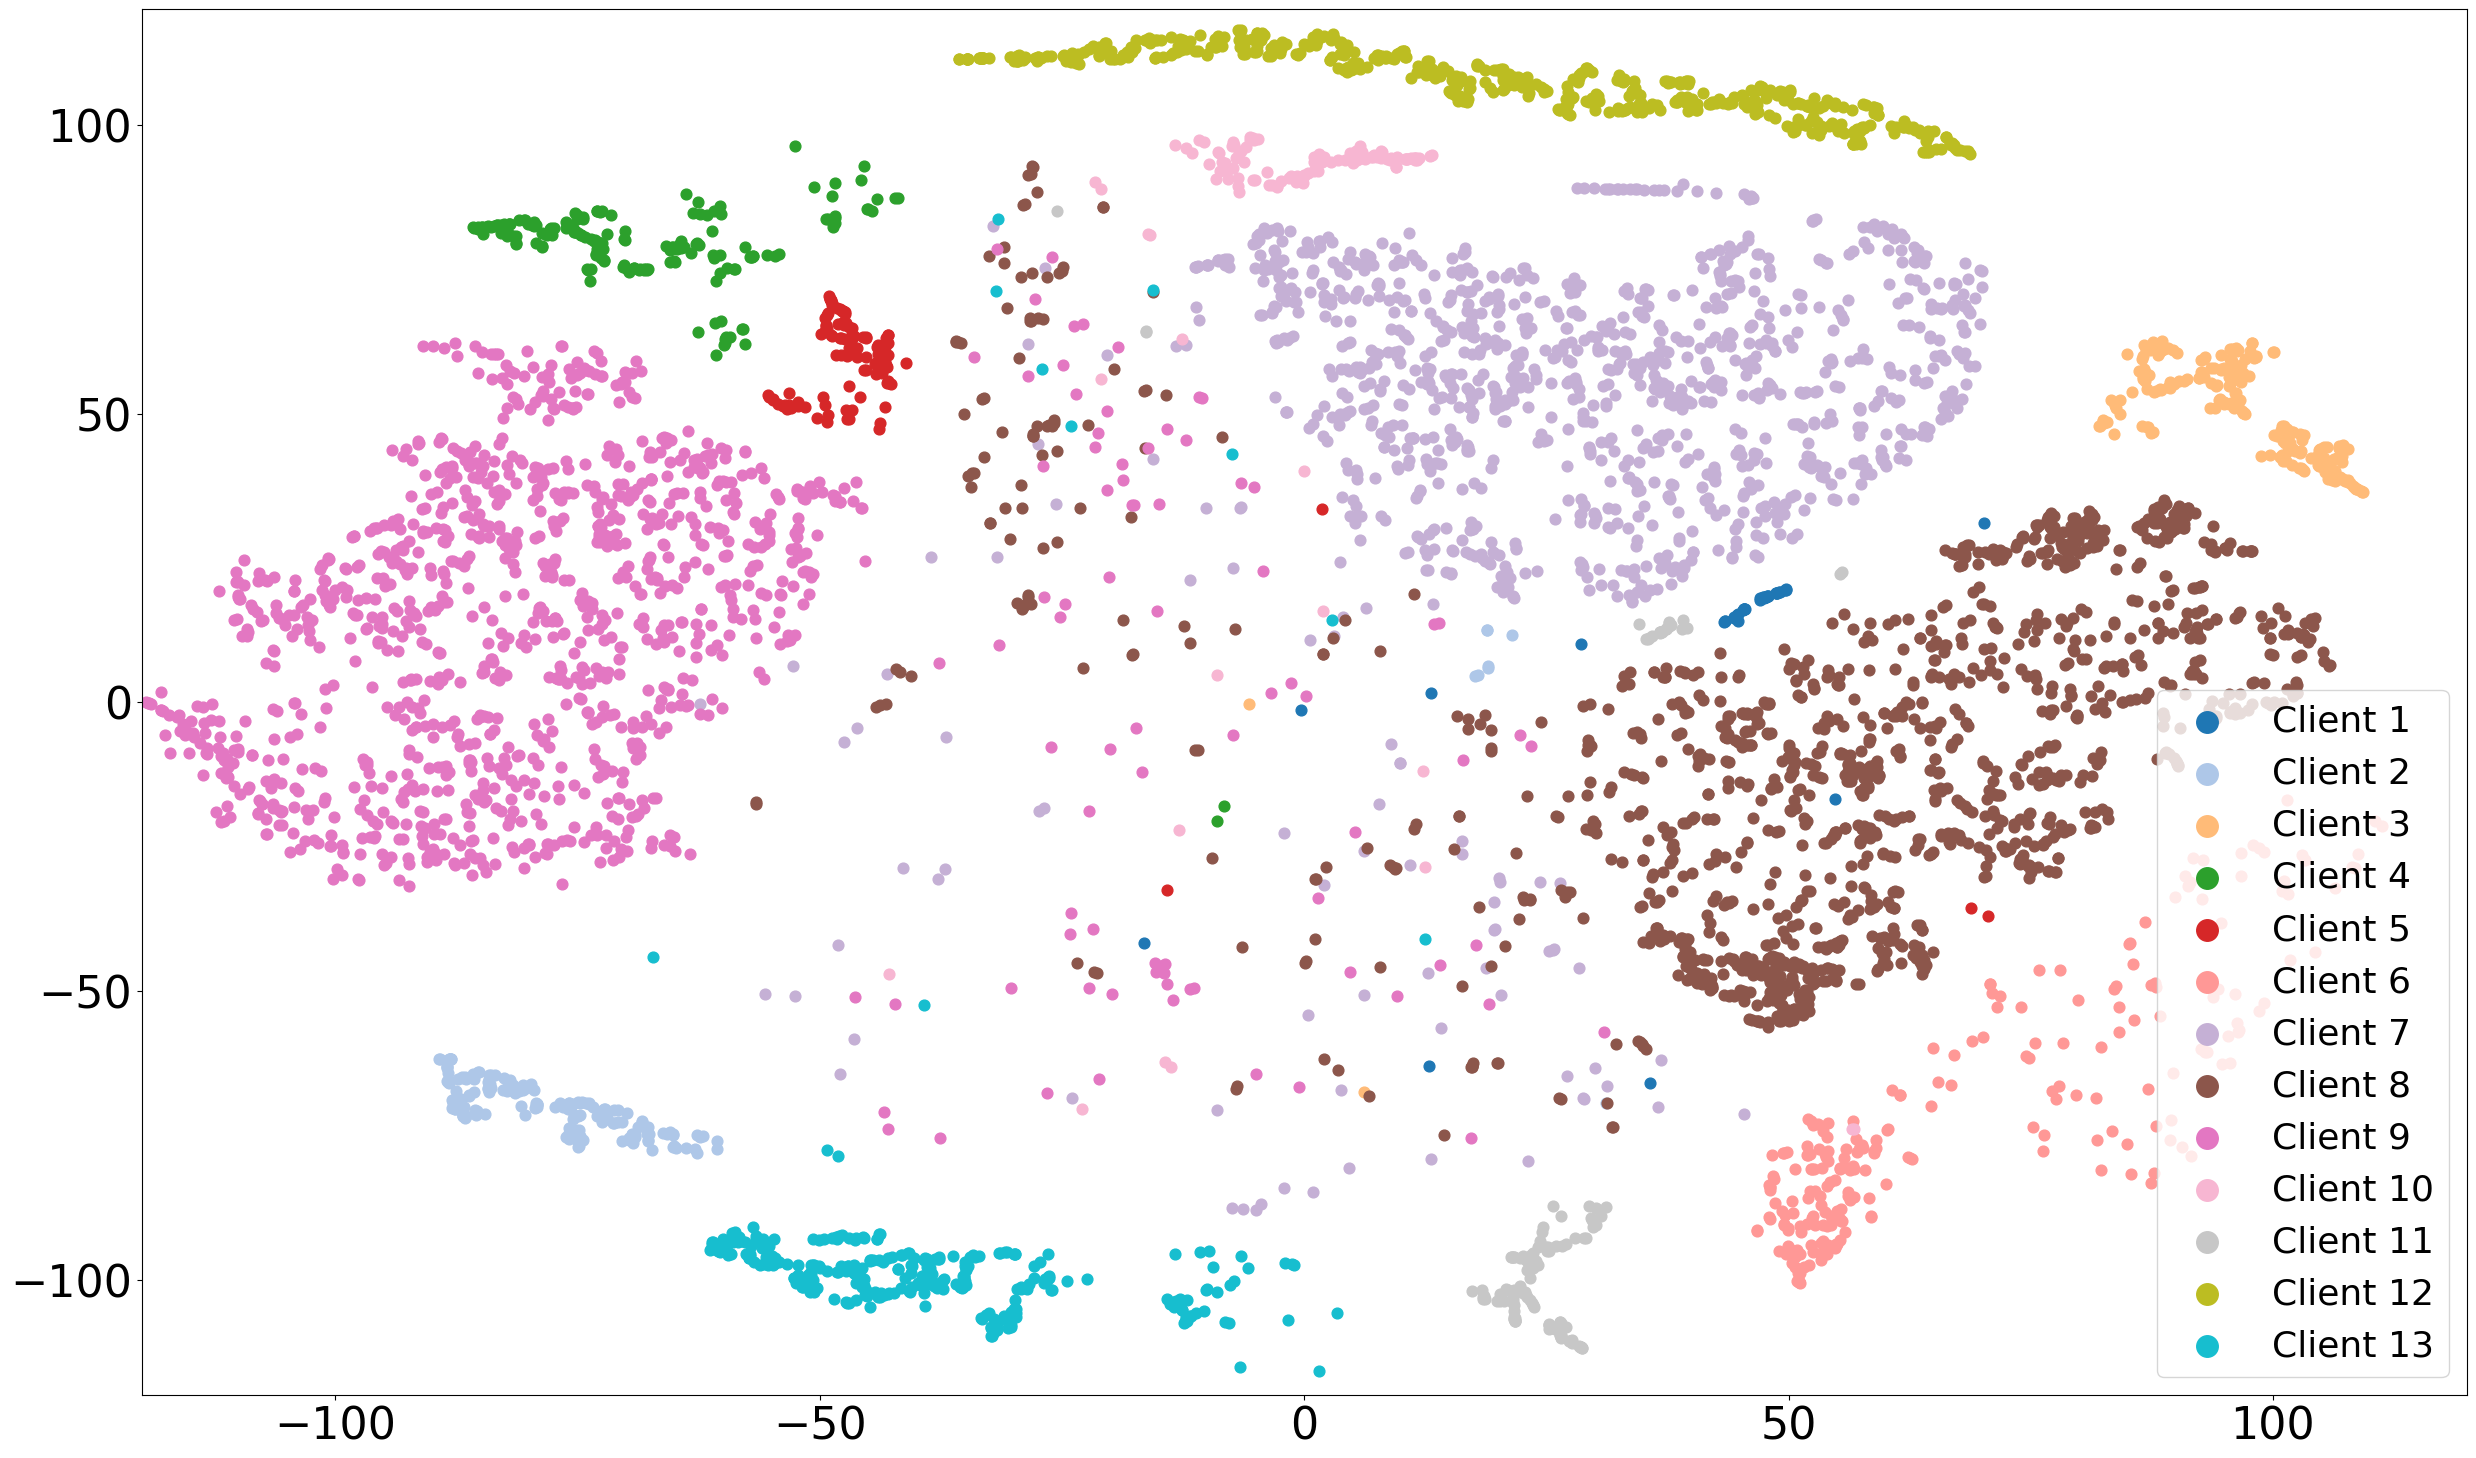

In [137]:

colors = []
NUM_COLORS = 13
cm = plt.get_cmap('tab20')
colors_use = list(map(cm, colors))
fig = plt.figure()
for client in range(1, client_num+1):
    data_size = X_embedded_local_global_clients[client].shape[0]
    colors_curr = data_size*[client]
    colors += colors_curr

ax = fig.add_subplot(111)
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

for client in range(1, client_num+1):
    labels_0 = labels_clients[client] == 0
    X_embedded_local_global_clients_only_label_0 = X_embedded_local_global_clients[client][labels_0, :]
    ax.scatter(X_embedded_local_global_clients_only_label_0[:,0], X_embedded_local_global_clients_only_label_0[:,1], label = f'Client {client}', s=60)



#ax.legend_elements()
ax.legend(prop={'size': 26}, markerscale=2)

plt.xlim(-120, 120)
plt.ylim(-120, 120)
plt.savefig(save_path + 'local_global_comparison_label_0')

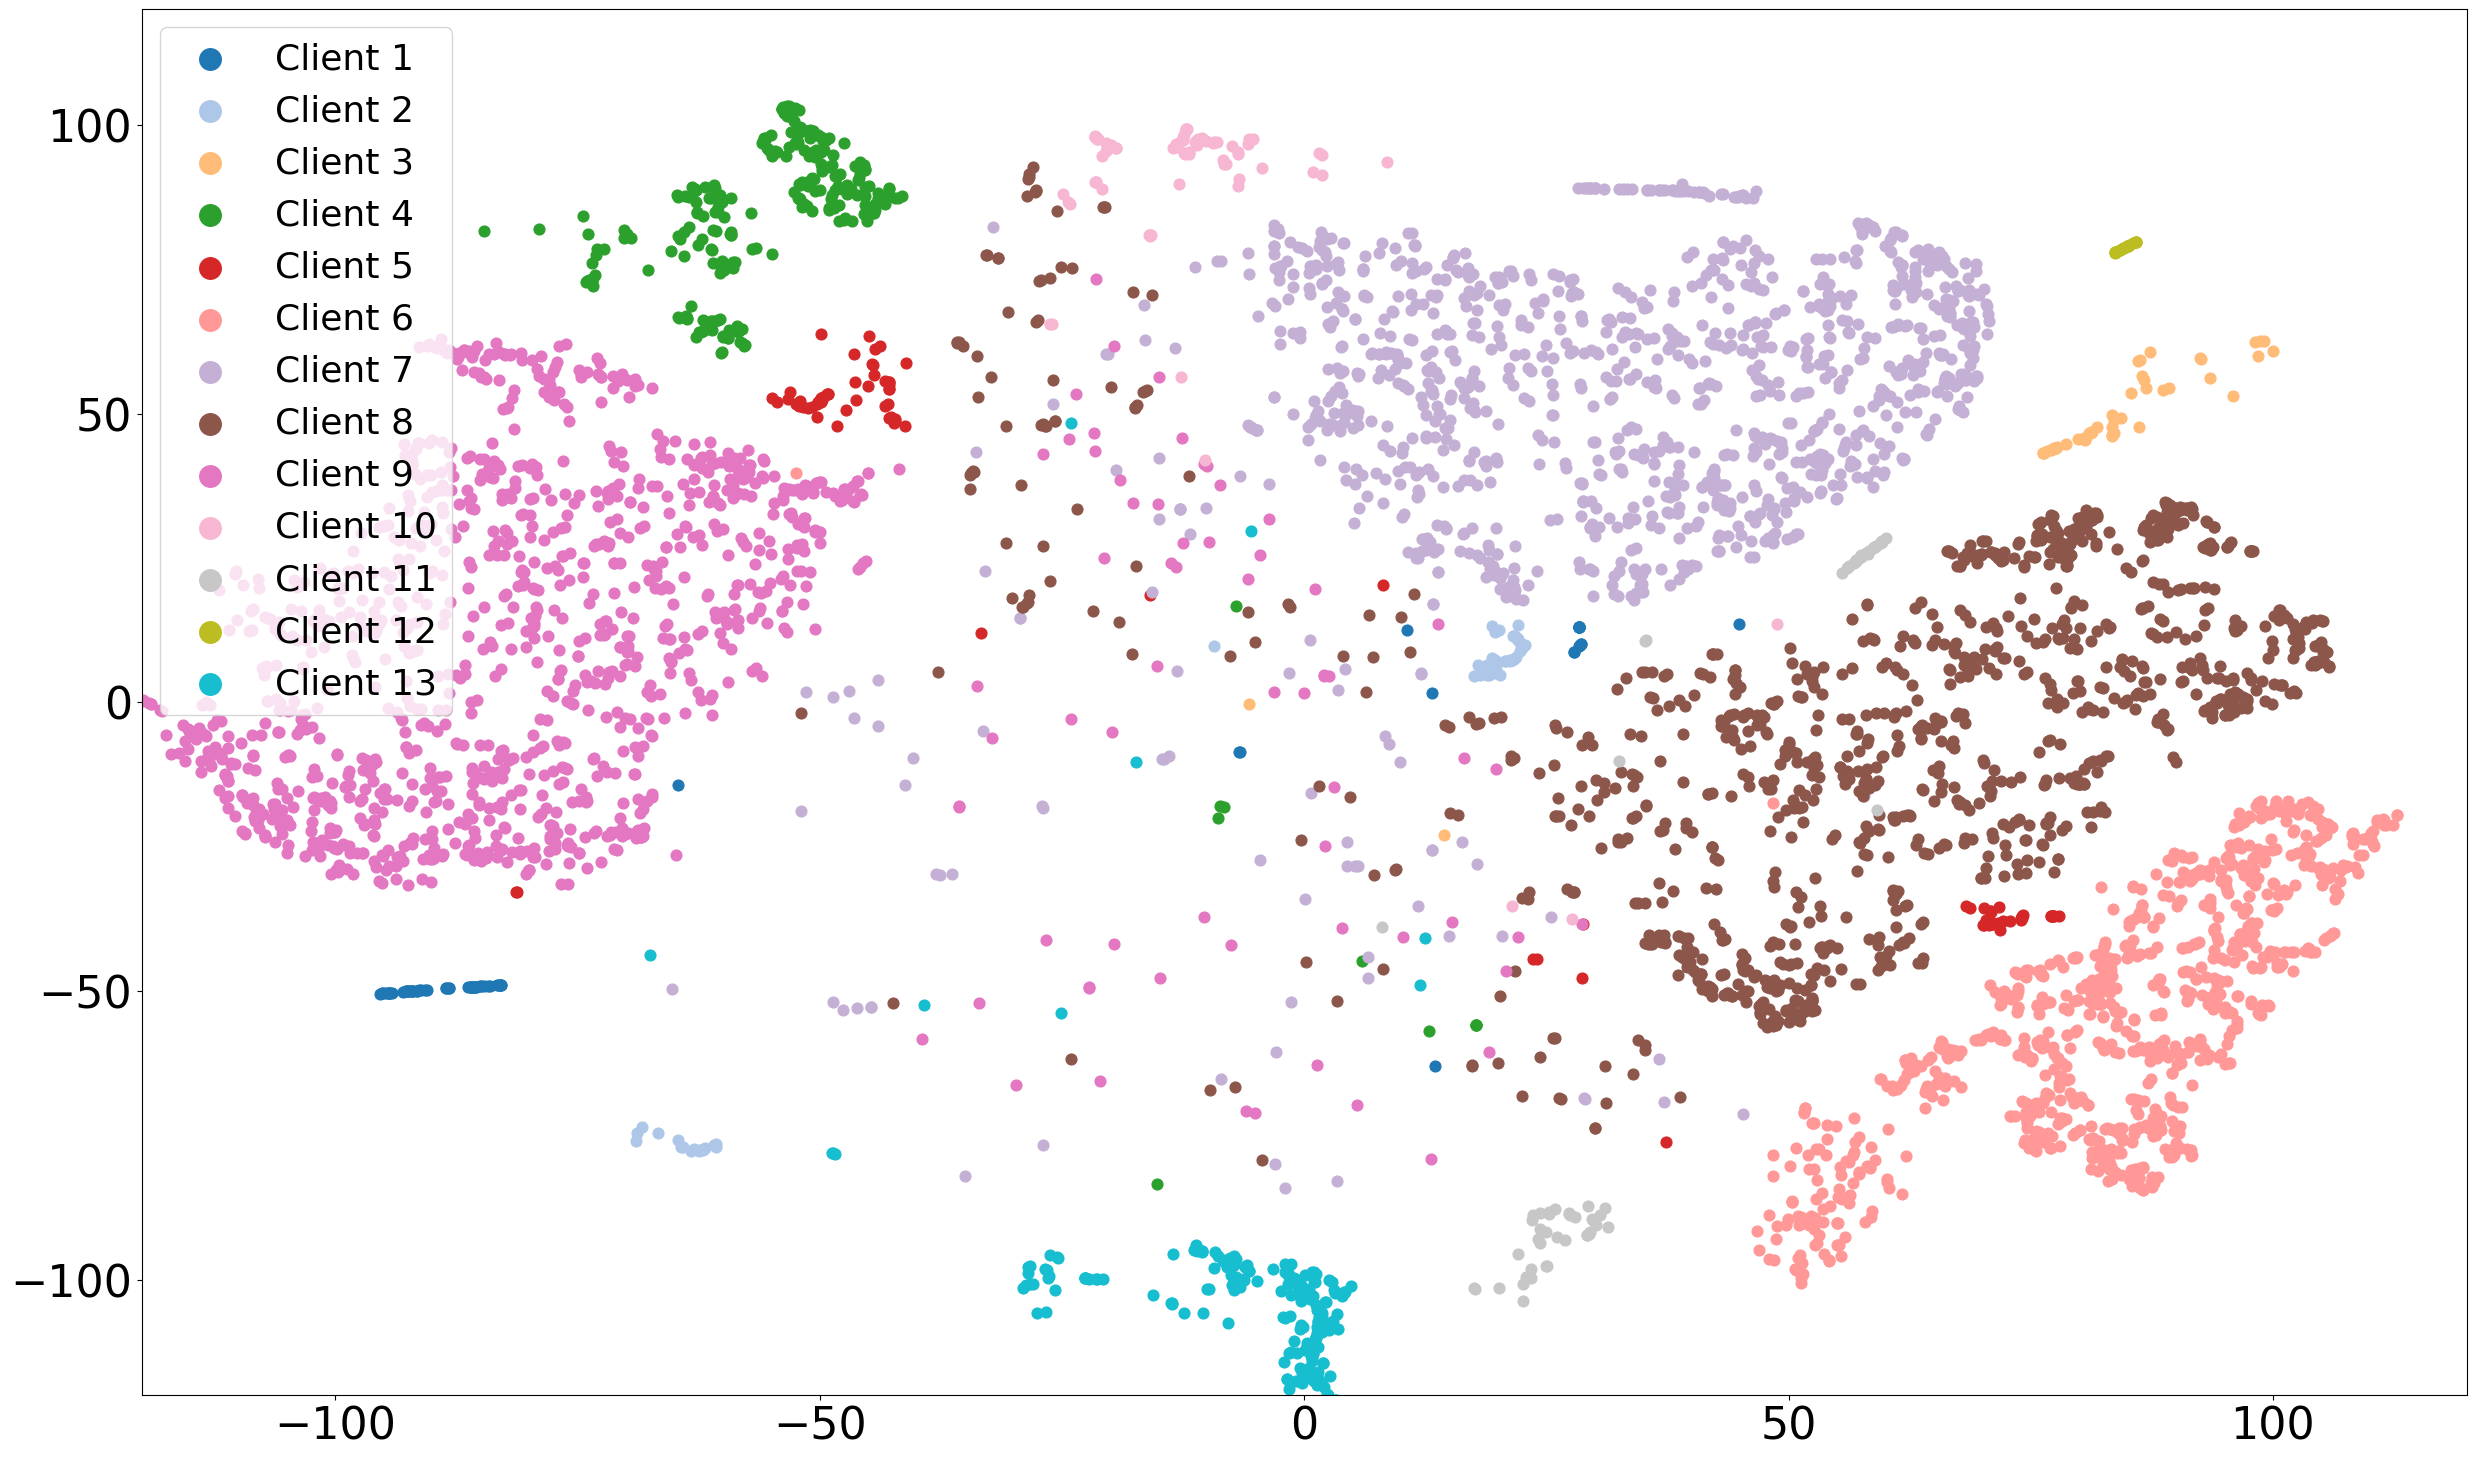

In [138]:

colors = []
NUM_COLORS = 13
cm = plt.get_cmap('tab20')
colors_use = list(map(cm, colors))
fig = plt.figure()
for client in range(1, client_num+1):
    data_size = X_embedded_local_global_clients[client].shape[0]
    colors_curr = data_size*[client]
    colors += colors_curr

ax = fig.add_subplot(111)
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

for client in range(1, client_num+1):
    labels_0 = labels_clients[client] == 1
    X_embedded_local_global_clients_only_label_0 = X_embedded_local_global_clients[client][labels_0, :]
    ax.scatter(X_embedded_local_global_clients_only_label_0[:,0], X_embedded_local_global_clients_only_label_0[:,1], label = f'Client {client}', s=60)



#ax.legend_elements()
ax.legend(prop={'size': 26}, markerscale=2)

plt.xlim(-120, 120)
plt.ylim(-120, 120)
plt.savefig(save_path + 'local_global_comparison_label_1')